In [44]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets

##Seaborn for fancy plots. 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import geopandas as gpd
from shapely.geometry import Point
#import fiona

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

import folium # mapping
from folium.plugins import HeatMap

In [45]:
df=pd.read_csv('merged_df_March24_2023.csv', encoding_errors='ignore')
df.drop(['Unnamed: 0', 'Cluster'], axis=1, inplace =True)
df

,NGH_Name,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,...,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response,Assessed Value
0,ABBOTTSFIELD,35,8,0,8,4,16,6,0,53.574143,...,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0,169735.372340
1,ALBANY,8,8,0,2,2,9,2,1,53.632382,...,10.0,56.0,63.0,30.0,9.0,14.0,13.0,3.0,350.0,225948.717949
2,ALBERTA AVENUE,123,119,1,26,13,156,99,2,53.568485,...,601.0,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0,237084.116140
3,ALDERGROVE,17,19,0,6,4,46,23,0,53.516888,...,119.0,266.0,284.0,135.0,72.0,49.0,22.0,12.0,952.0,323880.688807
4,ALLARD,6,17,0,1,0,12,3,4,53.401301,...,4.0,48.0,165.0,109.0,48.0,69.0,32.0,23.0,560.0,370119.635193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,WINTERBURN INDUSTRIAL AREA WEST,2,18,0,0,0,6,9,3,53.562804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,127236.714976
321,WOODCROFT,30,22,0,13,4,40,20,4,53.564595,...,214.0,121.0,107.0,32.0,24.0,29.0,6.0,5.0,642.0,304044.554455
322,YELLOWHEAD CORRIDOR EAST,7,15,0,2,0,18,18,2,53.579205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197000.000000
323,YORK,24,21,0,4,2,48,17,4,53.602843,...,148.0,297.0,271.0,103.0,65.0,42.0,14.0,5.0,510.0,275919.520548


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NGH_Name                       325 non-null    object 
 1   Assault                        325 non-null    int64  
 2   Break and Enter                325 non-null    int64  
 3   Homicide                       325 non-null    int64  
 4   Robbery                        325 non-null    int64  
 5   Sexual Assaults                325 non-null    int64  
 6   Theft From Vehicle             325 non-null    int64  
 7   Theft Of Vehicle               325 non-null    int64  
 8   Theft Over $5000               325 non-null    int64  
 9   Latitude                       325 non-null    float64
 10  Longitude                      325 non-null    float64
 11  Preschool                      325 non-null    float64
 12  Kindergarten                   325 non-null    flo

In [47]:
df.isnull().sum()

NGH_Name                         0
Assault                          0
Break and Enter                  0
Homicide                         0
Robbery                          0
Sexual Assaults                  0
Theft From Vehicle               0
Theft Of Vehicle                 0
Theft Over $5000                 0
Latitude                         0
Longitude                        0
Preschool                        0
Kindergarten                     0
Gr7-9                            0
Gr10-12                          0
Post-Secondary                   0
Homemaker                        0
Employed 0-30                    0
Employed 30+                     0
Unemployed                       0
Retired                          0
Permanently Unemployed           0
Employment_No Response           0
Income_Less than $30K            0
Income_30K to less than 60K      0
Income_60K to less than 100K     0
Income_100K to less than 125K    0
Income_125K to less than 150K    0
Income_150K to less 

In [48]:
#df=df[df['Assessed Value']>10000]

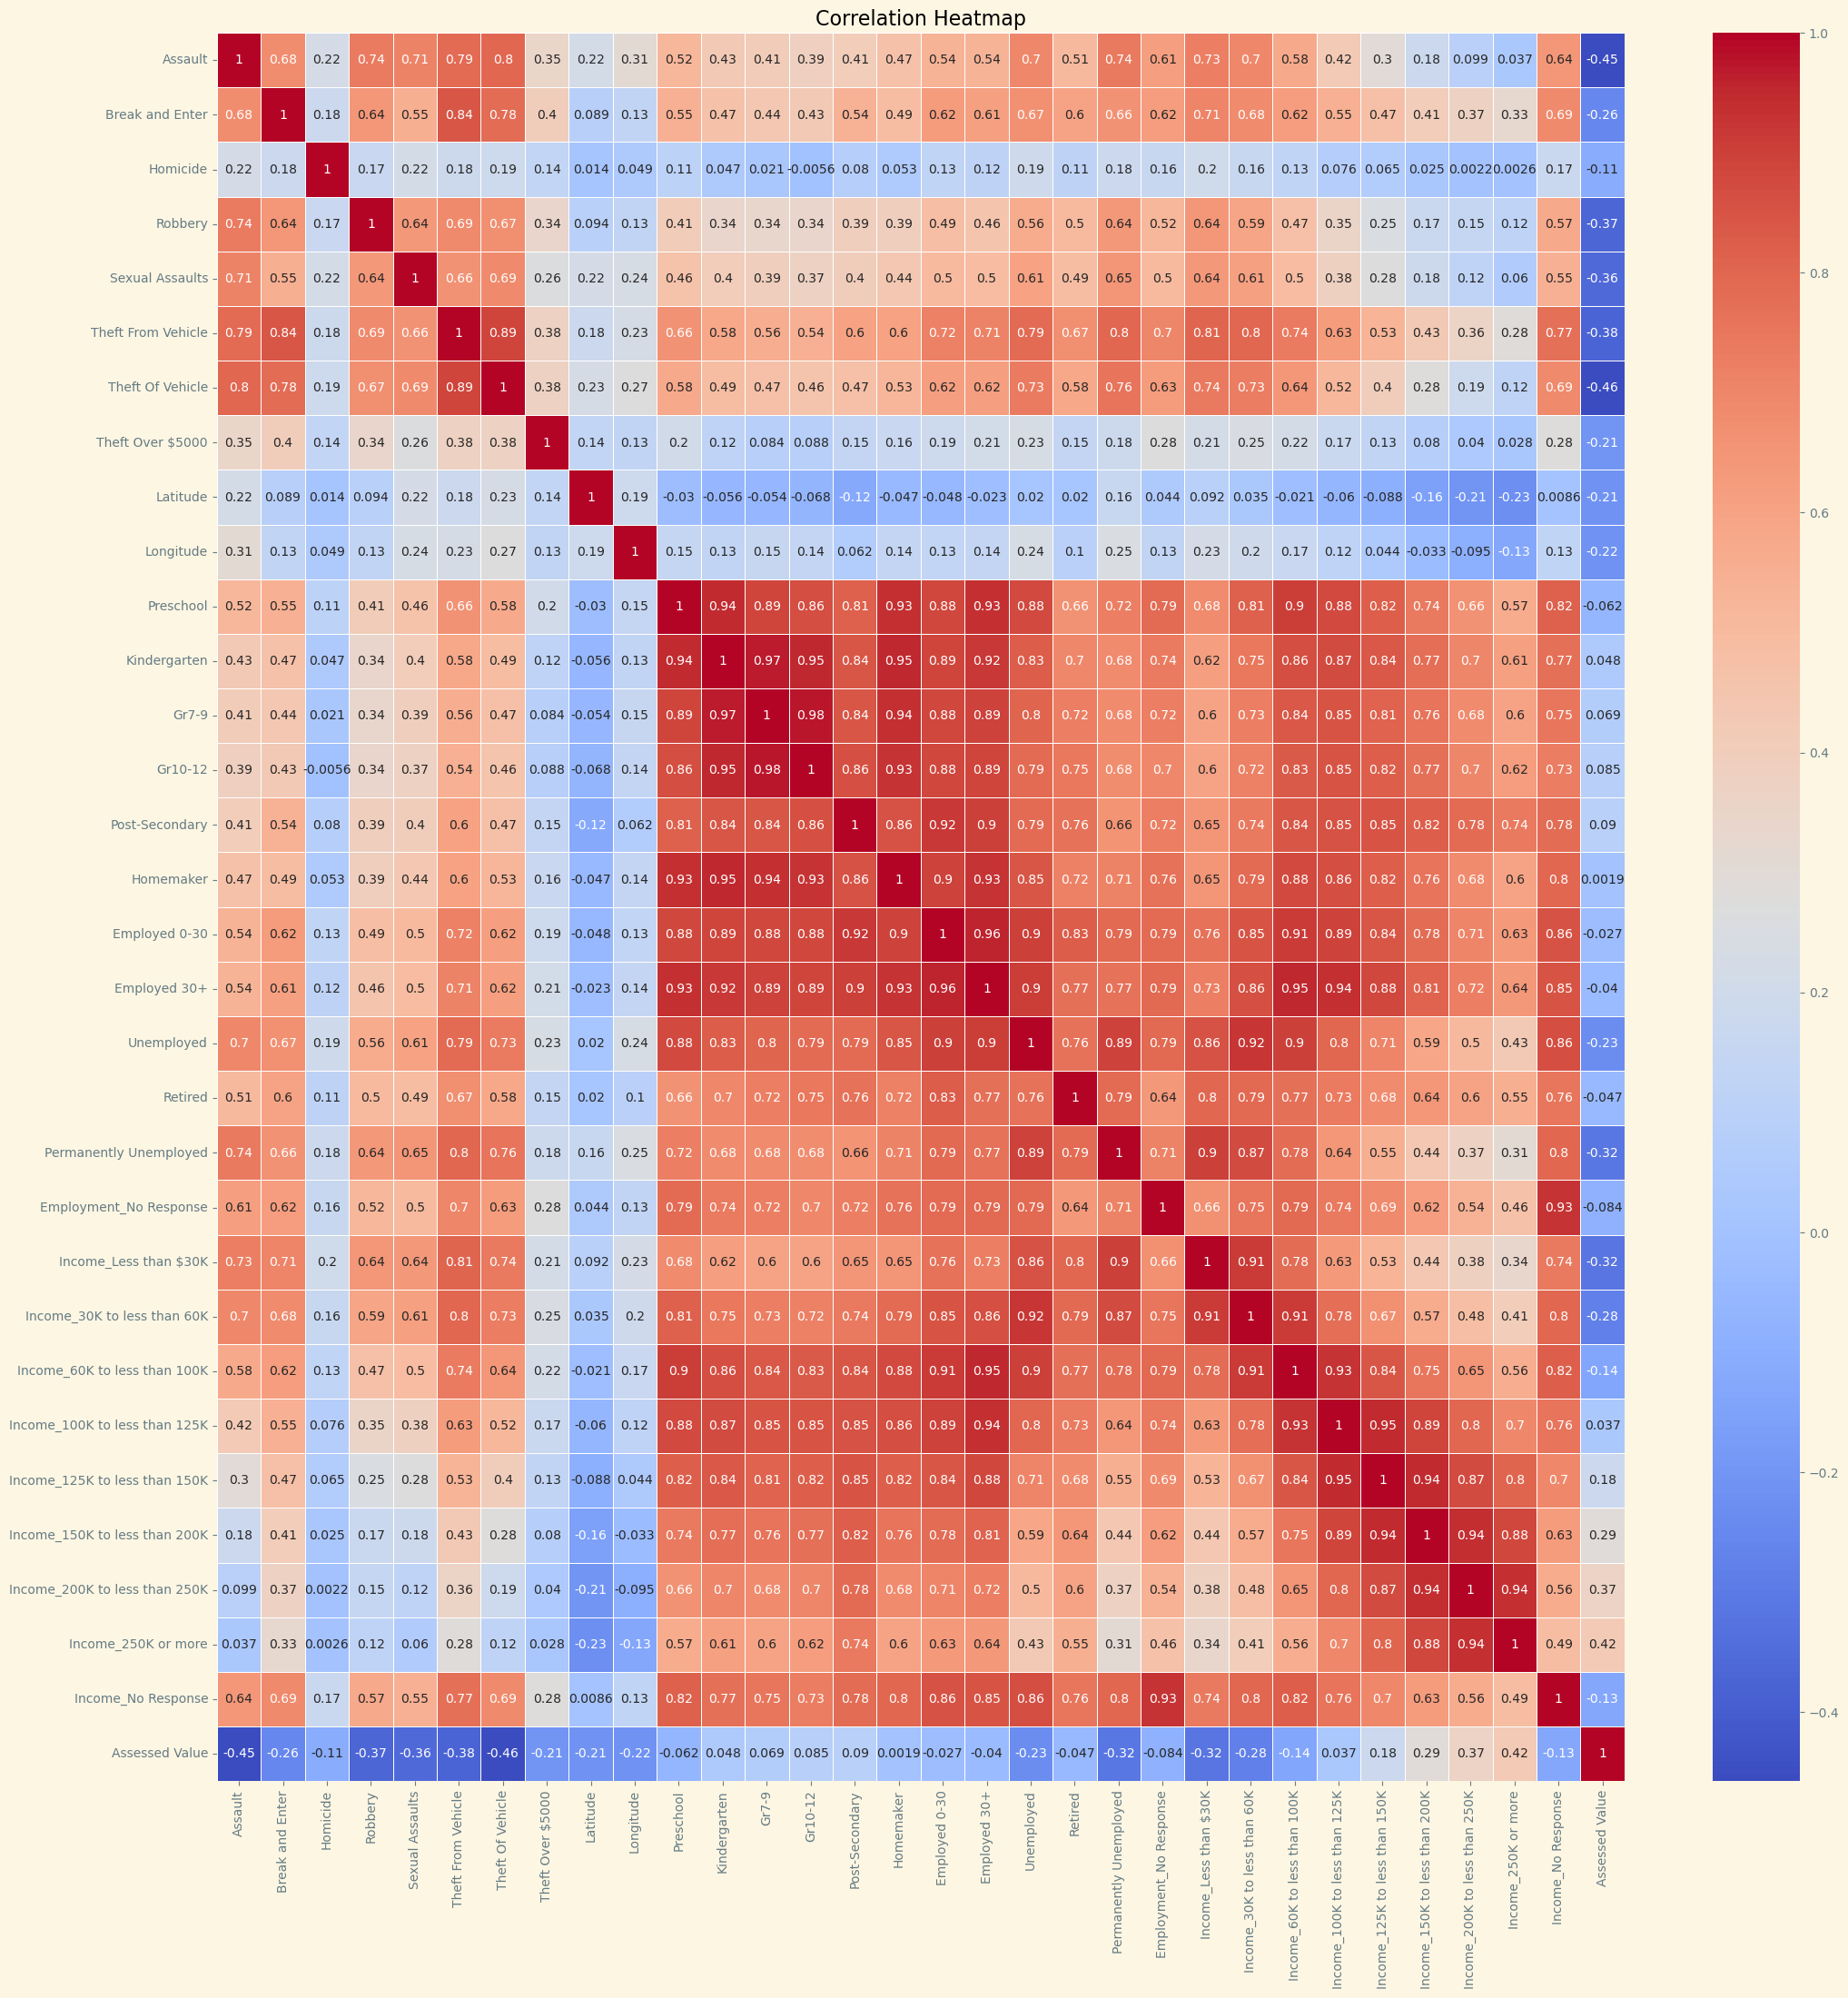

In [49]:
corr_matrix = df.corr(method='spearman')

# Create a heatmap using seaborn
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [50]:
"""This function uses the pandas corr() method to calculate the correlations between the target column and all other columns in the dataframe. 
    It then drops the target column from the list of correlations and gets the top 3 correlations (positive or negative) using the nlargest() method. 
    Finally, it prints the names of the top 3 correlated columns and their correlation sign (positive or negative) along with the correlation value."""

def get_top_correlations(data, target_column):
    # Calculate the correlations between the target column and all other columns
    correlations = data.corr(method='spearman')[target_column].sort_values(ascending=False)
    
    # Drop the target column from the list of correlations
    correlations = correlations.drop(target_column)
    
    # Get the top 3 correlations (positive or negative)
    top_correlations = correlations.abs().nlargest(3)
    
    # Print the top 3 correlations and their sign
    for column, correlation in top_correlations.items():
        sign = 'positive' if correlations[column] > 0 else 'negative'
        print(f"{column}: {sign} correlation ({correlation:.2f})")

In [51]:
get_top_correlations(df, 'Assessed Value')

Theft Of Vehicle: negative correlation (0.46)
Assault: negative correlation (0.45)
Income_250K or more: positive correlation (0.42)


>That output suggests that the 'Theft Of Vehicle' and 'Assault' columns have a negative correlation with 'Assessed Value', while the 'Income_250K or more' column has a positive correlation. This means that as the values of 'Theft Of Vehicle' and 'Assault' increase, the 'Assessed Value' tends to decrease, while as the value of 'Income_250K or more' increases, the 'Assessed Value' also tends to increase.

The significance of the top correlations is that they can provide insight into which factors may be driving the variation in the target column (in this case, the assessed value).

>For example, the negative correlation between the assessed value and theft of vehicle and assault suggests that areas with higher rates of these crimes may have lower assessed values. On the other hand, the positive correlation between assessed value and income of 250K or more suggests that areas with higher incomes may have higher assessed values.

In [115]:
get_top_correlations(df, 'Assault')

Theft Of Vehicle: positive correlation (0.80)
Theft From Vehicle: positive correlation (0.79)
Permanently Unemployed: positive correlation (0.74)


>It appears that there is a positive correlation between assault and theft of vehicle, theft from vehicle, and permanently unemployed individuals. This means that as the rate of assault increases in a neighborhood, there is likely to be a corresponding increase in the rates of theft of vehicle, theft from vehicle, and permanent unemployment. However, it's important to keep in mind that correlation does not necessarily imply causation, and further analysis would be needed to determine the underlying causes of these relationships.

To investigate the underlying causes of the relationships identified by the correlation analysis, you can perform further analysis and explore the data more deeply.

>For example, for the correlations identified for the Assault column, you could look at the neighborhoods with high rates of assault and see if there are any common factors that could be contributing to this. You could also look at the neighborhoods with high rates of theft from and theft of vehicles and see if there is any overlap with the high assault neighborhoods. Additionally, you could investigate the relationship between permanently unemployed individuals and assault rates, and look for any factors that could be contributing to this relationship, such as lack of economic opportunities or social factors that may increase the risk of crime.

In [119]:
property_crime = ['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']
severe_crime = ['Assault', 'Homicide', 'Robbery', 'Sexual Assaults']
income_levels = ['Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K',
                     'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K',
                     'Income_200K to less than 250K', 'Income_250K or more']
employment_status = ['Homemaker', 'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
                         'Permanently Unemployed', 'Employment_No Response']
education_level = ['Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']


In [120]:
def plot_crime_correlations(data, severe_crime_cols, property_crime_cols):
    # Create a new dataframe with just the specified crime columns
    crime_data = data[severe_crime_cols + property_crime_cols]
    
    # Calculate the correlation matrix
    corr = crime_data.corr(method='spearman')
    
    # Plot the correlation matrix heatmap
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title('Correlation Matrix for Severe and Property Crimes')
    plt.show()

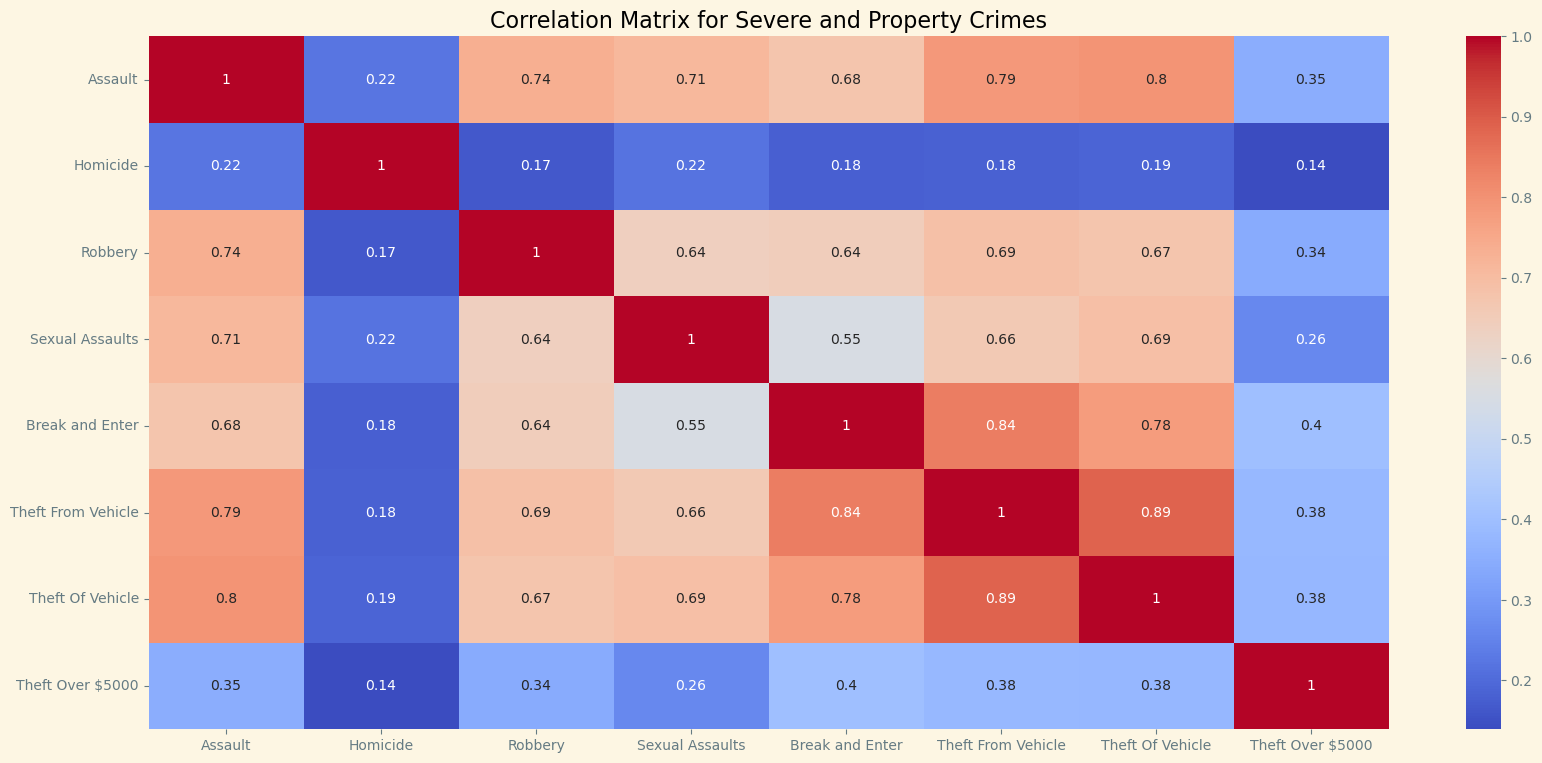

In [121]:
plot_crime_correlations(df, severe_crime, property_crime)

In [123]:
get_top_correlations(df[income_levels + severe_crime], 'Assault')

Robbery: positive correlation (0.74)
Income_Less than $30K: positive correlation (0.73)
Sexual Assaults: positive correlation (0.71)


In [127]:
def plot_heatmap2(data):
    # Calculate the correlation matrix
    corr = data.corr(method='spearman')

    # Generate a heatmap with the correlation matrix
    plt.figure(figsize=(20,10))
    sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

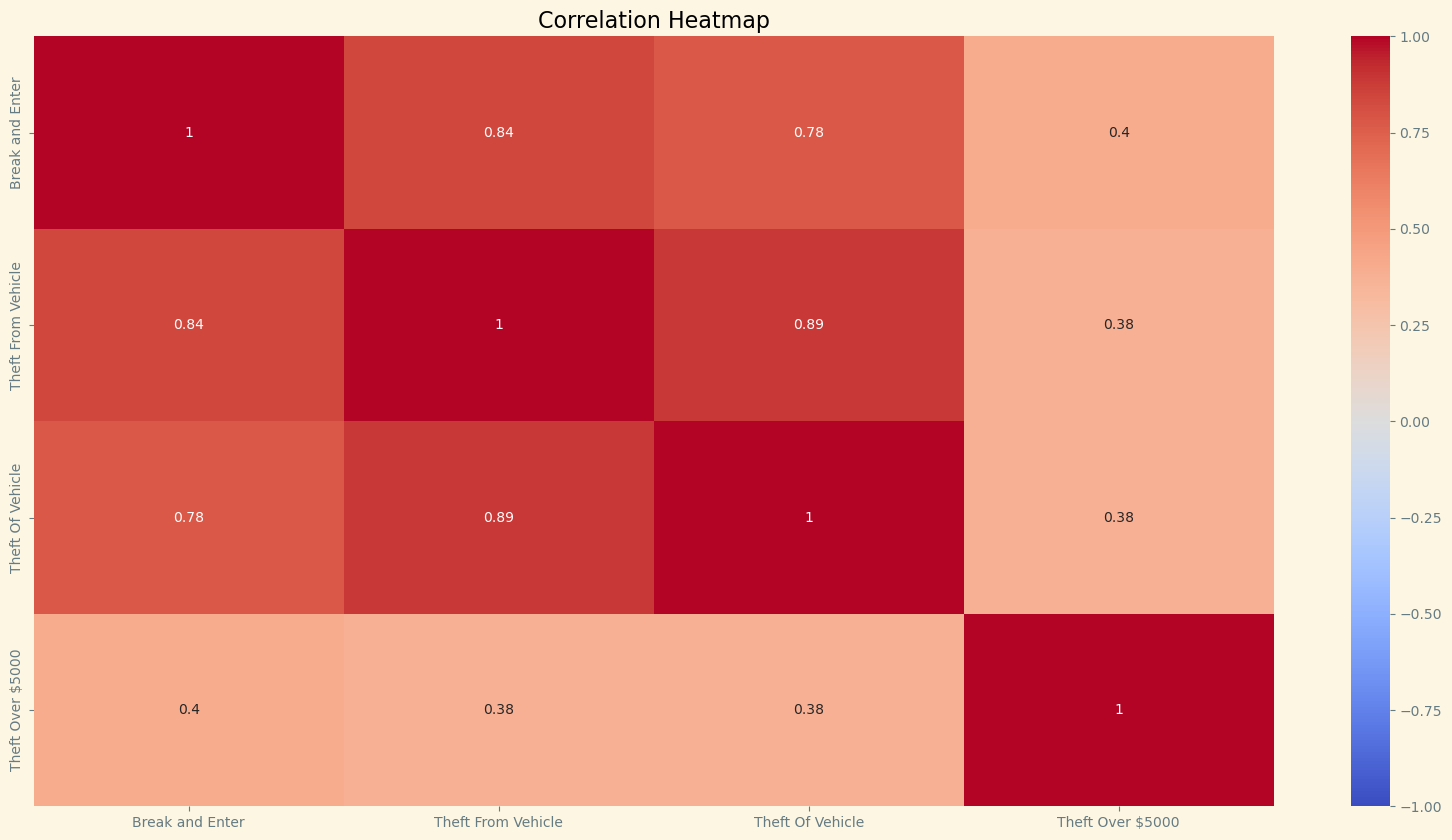

In [128]:
plot_heatmap2(df[property_crime])

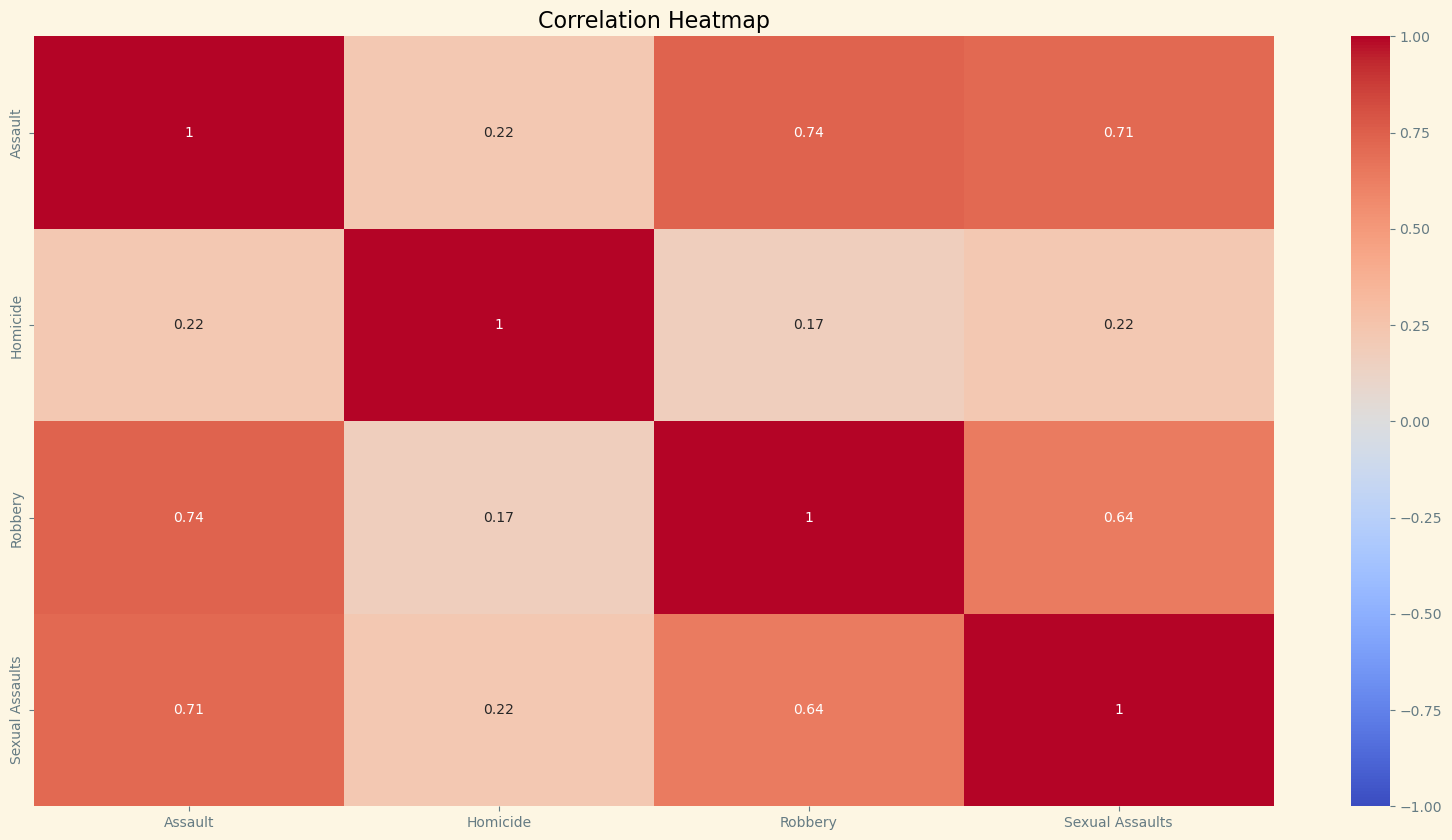

In [129]:
plot_heatmap2(df[severe_crime])

## Clustering

In [52]:
df.iloc[:,1:]

,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,Longitude,...,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response,Assessed Value
0,35,8,0,8,4,16,6,0,53.574143,-113.388758,...,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0,169735.372340
1,8,8,0,2,2,9,2,1,53.632382,-113.549464,...,10.0,56.0,63.0,30.0,9.0,14.0,13.0,3.0,350.0,225948.717949
2,123,119,1,26,13,156,99,2,53.568485,-113.485119,...,601.0,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0,237084.116140
3,17,19,0,6,4,46,23,0,53.516888,-113.641242,...,119.0,266.0,284.0,135.0,72.0,49.0,22.0,12.0,952.0,323880.688807
4,6,17,0,1,0,12,3,4,53.401301,-113.526641,...,4.0,48.0,165.0,109.0,48.0,69.0,32.0,23.0,560.0,370119.635193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2,18,0,0,0,6,9,3,53.562804,-113.701391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,127236.714976
321,30,22,0,13,4,40,20,4,53.564595,-113.558327,...,214.0,121.0,107.0,32.0,24.0,29.0,6.0,5.0,642.0,304044.554455
322,7,15,0,2,0,18,18,2,53.579205,-113.451964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197000.000000
323,24,21,0,4,2,48,17,4,53.602843,-113.430212,...,148.0,297.0,271.0,103.0,65.0,42.0,14.0,5.0,510.0,275919.520548


In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:,1:])

c:\Users\azimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


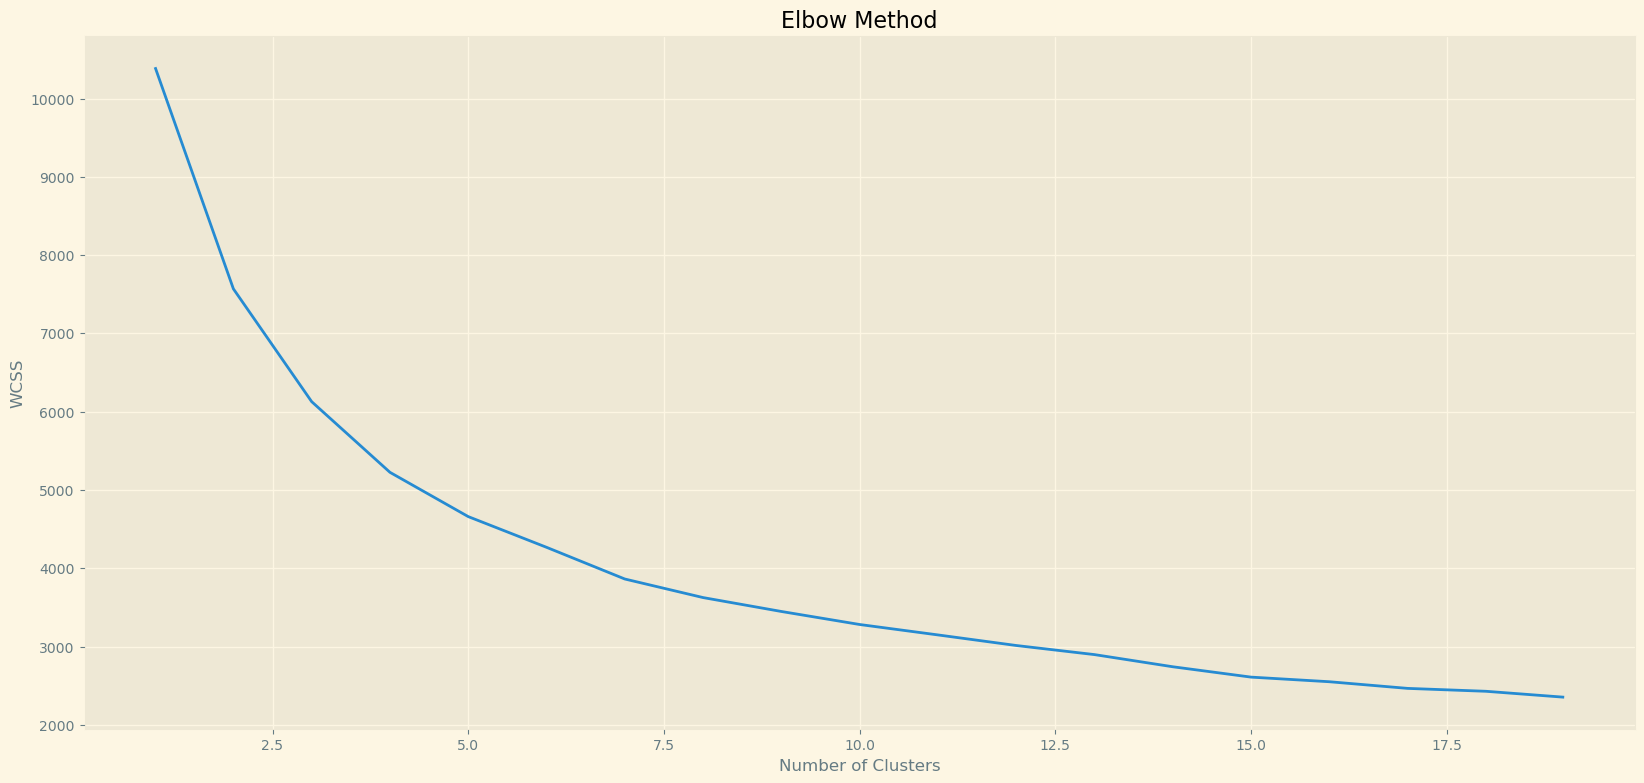

In [54]:
# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

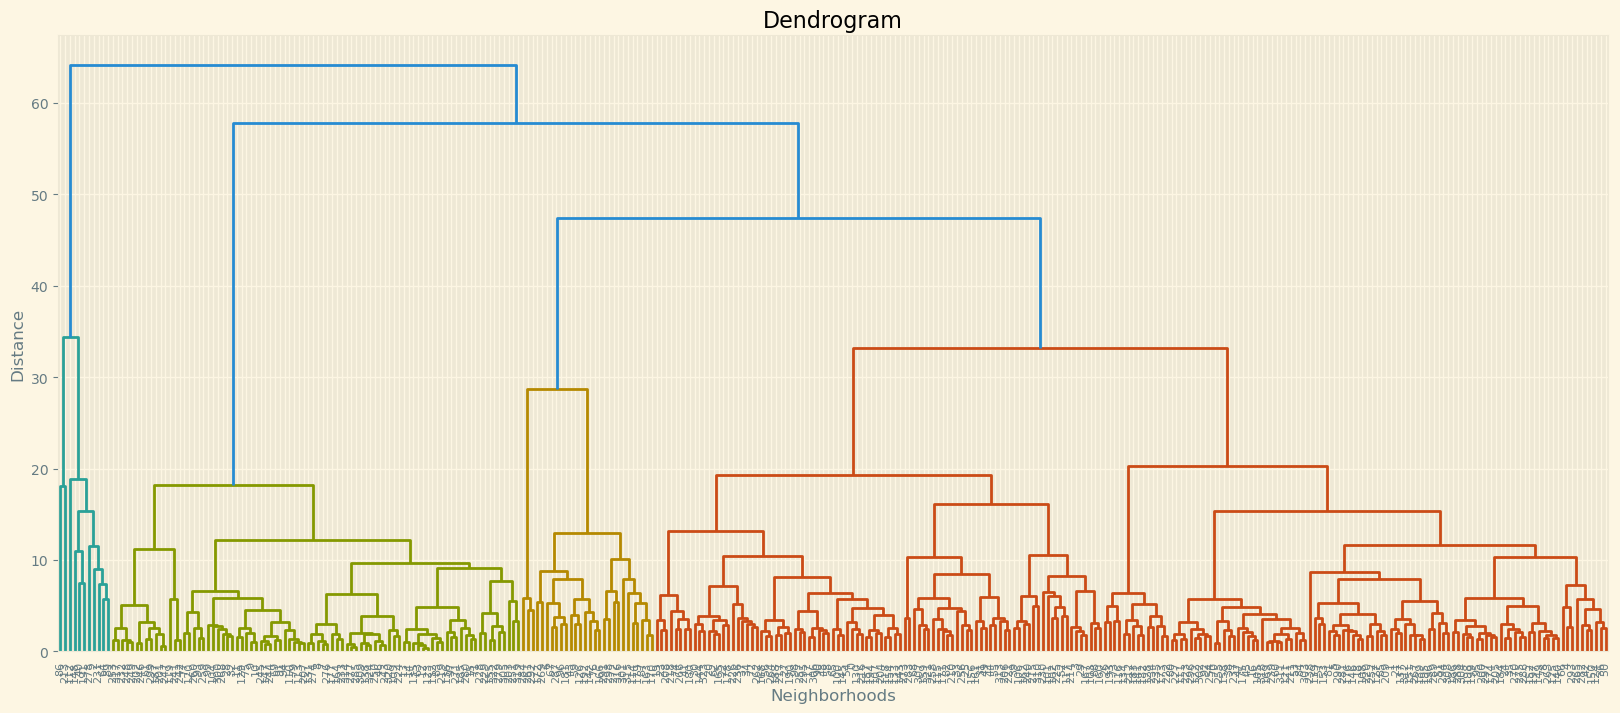

In [55]:
import scipy.cluster.hierarchy as shc

# Generate the linkage matrix using complete linkage
linkage_matrix = shc.linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 8))
plt.title('Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
shc.dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.show()

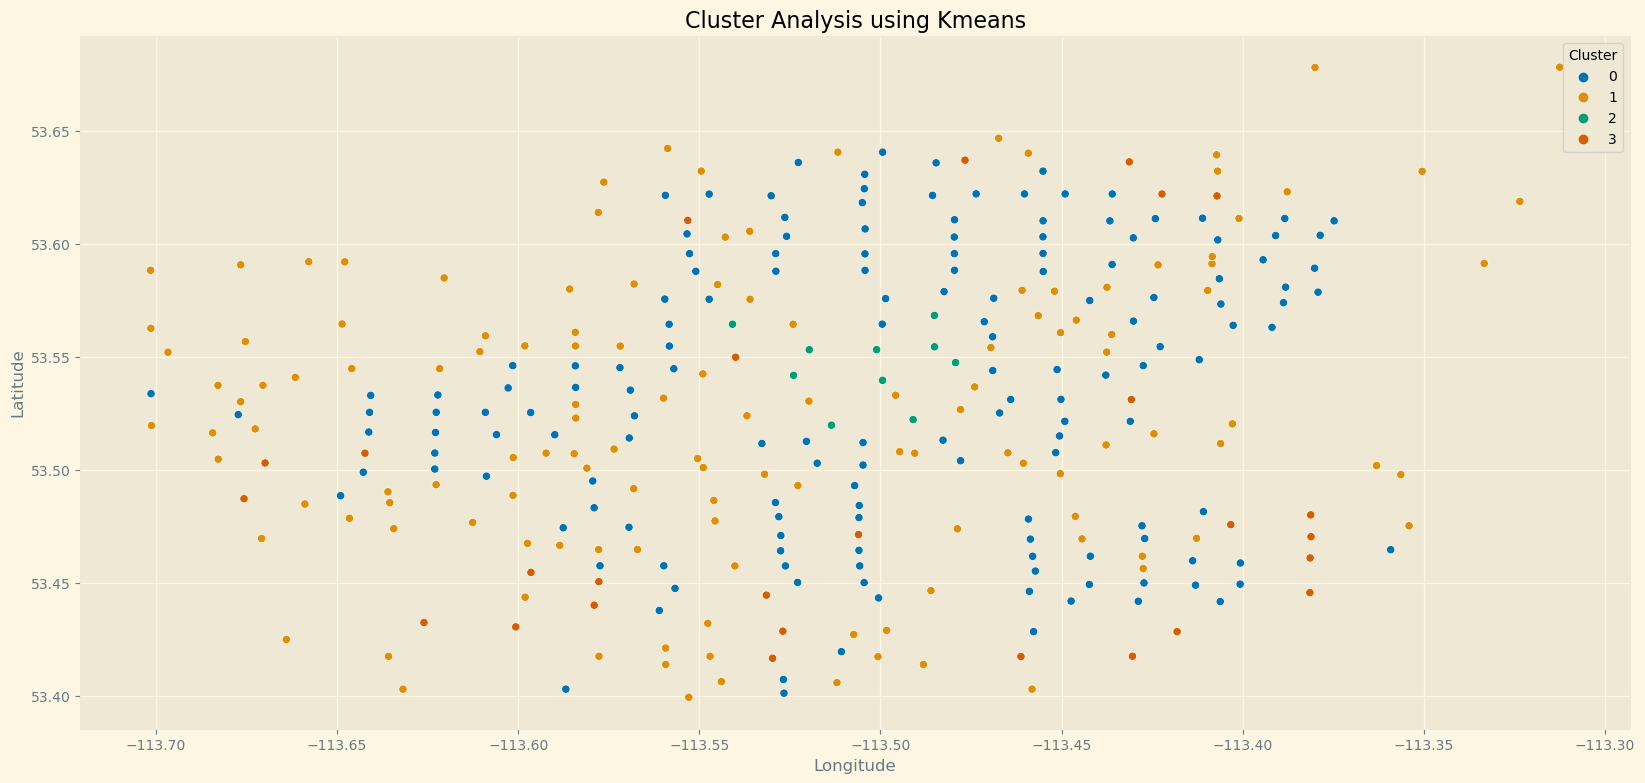

In [156]:
# Create the KMeans model and fit to the standardized data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1100, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = pred_y

# Plot the clusters
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Cluster', palette='colorblind')
#sns.scatterplot(x='Latitude', y='Longitude', data=df, hue='Cluster', palette='colorblind')
plt.title('Cluster Analysis using Kmeans')
plt.show()

In [57]:
df['Cluster'].value_counts()

0    156
1    132
3     27
2     10
Name: Cluster, dtype: int64

In [58]:
cluster_0=df[df['Cluster']==0]
cluster_1=df[df['Cluster']==1]
cluster_2=df[df['Cluster']==2]
cluster_3=df[df['Cluster']==3]
#cluster_4=df[df['Cluster']==4]
#cluster_5=df[df['Cluster']==5]
#cluster_6=df[df['Cluster']==6]

In [145]:
cluster_0['NGH_Name']

0              ABBOTTSFIELD
3                ALDERGROVE
4                    ALLARD
5                 ALLENDALE
17                  ATHLONE
               ...         
307       WEST JASPER PLACE
308    WEST MEADOWLARK PARK
313                WESTWOOD
321               WOODCROFT
323                    YORK
Name: NGH_Name, Length: 156, dtype: object

In [146]:
cluster_1['NGH_Name']

1                               ALBANY
7                       ANTHONY HENDAY
8              ANTHONY HENDAY BIG LAKE
9           ANTHONY HENDAY ENERGY PARK
10        ANTHONY HENDAY LAKE DISTRICT
                    ...               
318                       WINDSOR PARK
319    WINTERBURN INDUSTRIAL AREA EAST
320    WINTERBURN INDUSTRIAL AREA WEST
322           YELLOWHEAD CORRIDOR EAST
324              YOUNGSTOWN INDUSTRIAL
Name: NGH_Name, Length: 132, dtype: object

In [147]:
cluster_2['NGH_Name']

2         ALBERTA AVENUE
40          BOYLE STREET
64     CENTRAL MCDOUGALL
86              DOWNTOWN
112              GARNEAU
148            INGLEWOOD
191             MCCAULEY
213               OLIVER
231      QUEEN MARY PARK
278           STRATHCONA
Name: NGH_Name, dtype: object

In [148]:
cluster_3['NGH_Name']

6              AMBLESIDE
43             BRINTNELL
67          CHARLESWORTH
76            CUMBERLAND
87                DUGGAN
114          GLASTONBURY
128               HADDOW
142       HOLLICK-KENYON
163      KINISKI GARDENS
166           KLARVATTEN
170             LARKSPUR
172               LAUREL
179              LYMBURN
181              MACEWAN
192      MCCONACHIE AREA
215             OTTEWELL
261           RUTHERFORD
269         SILVER BERRY
272    SOUTH TERWILLEGAR
284           SUMMERSIDE
291    TERWILLEGAR TOWNE
292         THE HAMPTONS
298          TWIN BROOKS
301               WALKER
310            WESTMOUNT
315            WILD ROSE
316           WINDERMERE
Name: NGH_Name, dtype: object

In [59]:
cluster_2['NGH_Name']

2         ALBERTA AVENUE
40          BOYLE STREET
64     CENTRAL MCDOUGALL
86              DOWNTOWN
112              GARNEAU
148            INGLEWOOD
191             MCCAULEY
213               OLIVER
231      QUEEN MARY PARK
278           STRATHCONA
Name: NGH_Name, dtype: object

In [60]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the clustering result
df_clustered = df.drop('NGH_Name', axis=1)
silhouette_avg = silhouette_score(df_clustered, pred_y)

print(f'The silhouette score is {silhouette_avg:.3f}')

The silhouette score is -0.332


>A negative silhouette score indicates that the clustering is not appropriate or that there is a high degree of overlap between clusters. In this case, it suggests that the current clustering may not be the best fit for the data. It's possible that using a different clustering algorithm or tweaking the parameters of the current algorithm could lead to a better result.

Lets try Clustering using Gaussian Mixture GMM

In [154]:
from sklearn.mixture import GaussianMixture

# Create the GMM model and fit to the standardized data
gmm = GaussianMixture(n_components=4, random_state=42)
pred_y = gmm.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df['Cluster_GMM'] = pred_y

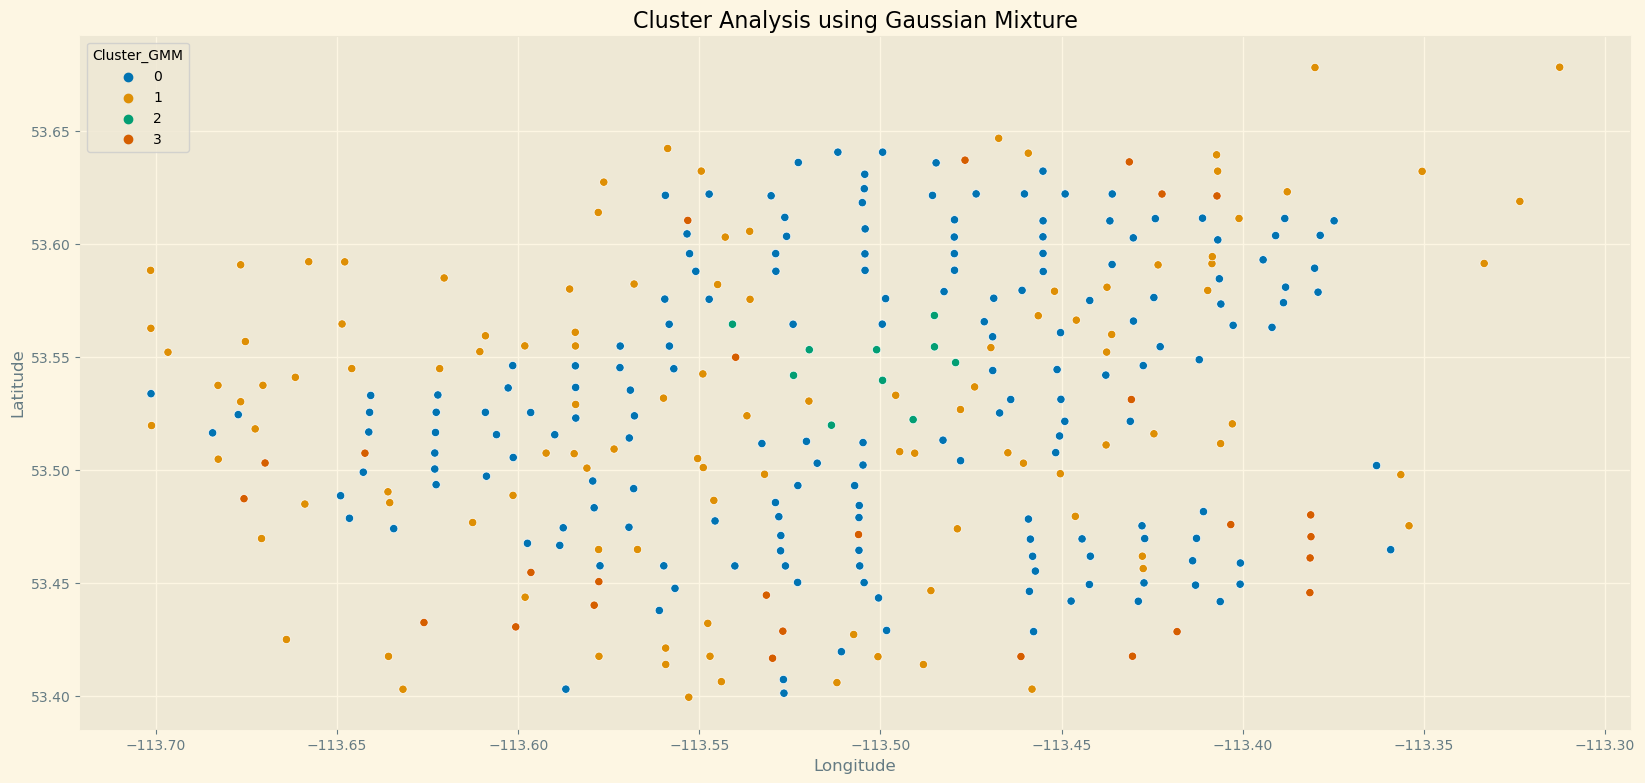

In [155]:
# Plot the clusters
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Cluster_GMM', palette='colorblind')
plt.title('Cluster Analysis using Gaussian Mixture')
plt.show()

3D Plot

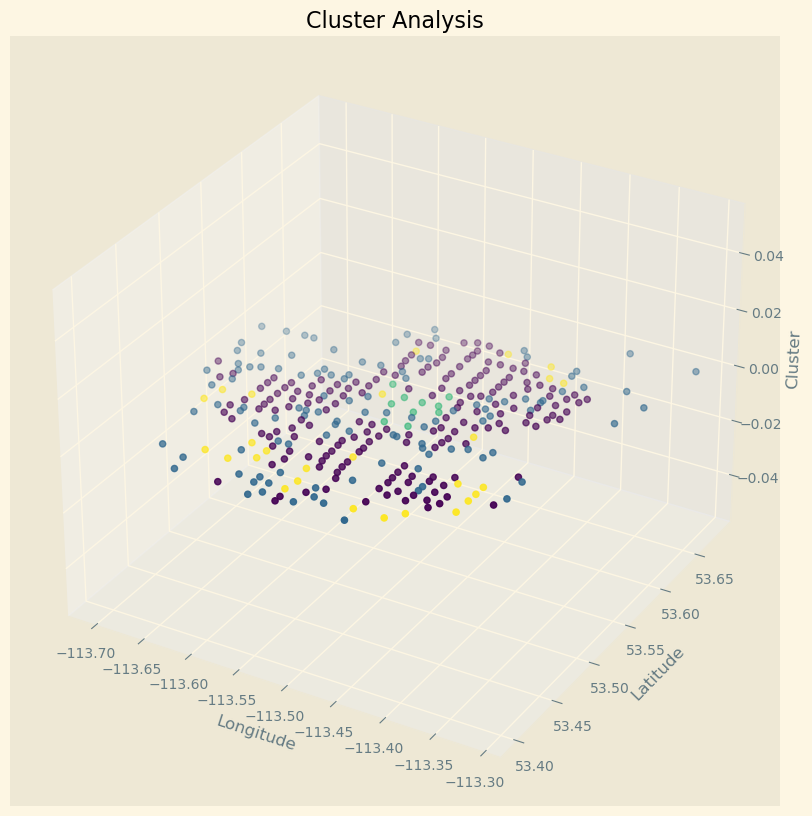

In [158]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of the clusters
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Longitude'], df['Latitude'], zs=0, c=df['Cluster_GMM'], cmap='viridis')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Cluster')
ax.set_title('Cluster Analysis')
plt.show()

Shall we look at animated 3D?

In [163]:
import plotly.graph_objects as go

# Create a Plotly 3D scatter plot of the clusters
fig = go.Figure(data=[go.Scatter3d(
    x=df['Longitude'],
    y=df['Latitude'],
    z=[0] * len(df),  # set z to 0 to place all the points at the same z-coordinate
    mode='markers',
    marker=dict(
        size=5,
        color=df['Cluster'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Define the frames for each cluster
frames = []
for i in range(4):
    frame = go.Frame(
        data=[go.Scatter3d(
            x=df[df['Cluster'] == i]['Longitude'],
            y=df[df['Cluster'] == i]['Latitude'],
            z=[0] * len(df[df['Cluster'] == i]),
            mode='markers',
            marker=dict(
                size=5,
                color=df[df['Cluster'] == i]['Cluster'],
                colorscale='Viridis',
                opacity=0.8
            )
        )],
        name=f'Cluster {i}'
    )
    frames.append(frame)

# Define the animation object
animation = dict(
    frames=frames,
    repeat=True,
    showlegend=False,
    transition=dict(duration=1000)
)

# Set layout properties and add the animation
fig.update_layout(
    width=1000,
    height=1000,
    scene=dict(
        xaxis=dict(title='Longitude'),
        yaxis=dict(title='Latitude'),
        zaxis=dict(title='Cluster')
    ),
    title='Cluster Analysis',
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, animation]
        )]
    )]
)

# Show the plot
fig.show()


In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Using Geopandas
# first need to get out edmonton/neighbourhoods shape file..and change the columns to match our datafile
#https://data.edmonton.ca/Geospatial-Boundaries/2016-Federal-Census-Neighbourhoods-as-of-Official-/3did-mjnj
edmonton_shp=gpd.read_file('geo_export_67517c45-71c1-4f9b-8051-9eaf76457140.shp', geometry='geometry')
edmonton_shp.rename(columns={'name': 'NGH_Name', 'neighbourh': 'NGH_Number'}, inplace=True)
edmonton_shp.drop(['descriptiv', 'date_effec', 'time_effec', 'date_eff_2', 'time_eff_2', 'descriptio'], axis=1, inplace =True)
edmonton_shp.head()

,NGH_Number,NGH_Name,geometry
0,5310.0,PARKALLEN,"POLYGON ((-113.52294 53.50390, -113.52299 53.5..."
1,4400.0,PLACE LARUE,"POLYGON ((-113.63538 53.53748, -113.63986 53.5..."
2,5170.0,EMPIRE PARK,"POLYGON ((-113.49897 53.48824, -113.49765 53.4..."
3,2270.0,EVERGREEN,"POLYGON ((-113.35656 53.62863, -113.35664 53.6..."
4,5520.0,UNIVERSITY OF ALBERTA,"POLYGON ((-113.51500 53.52575, -113.51500 53.5..."


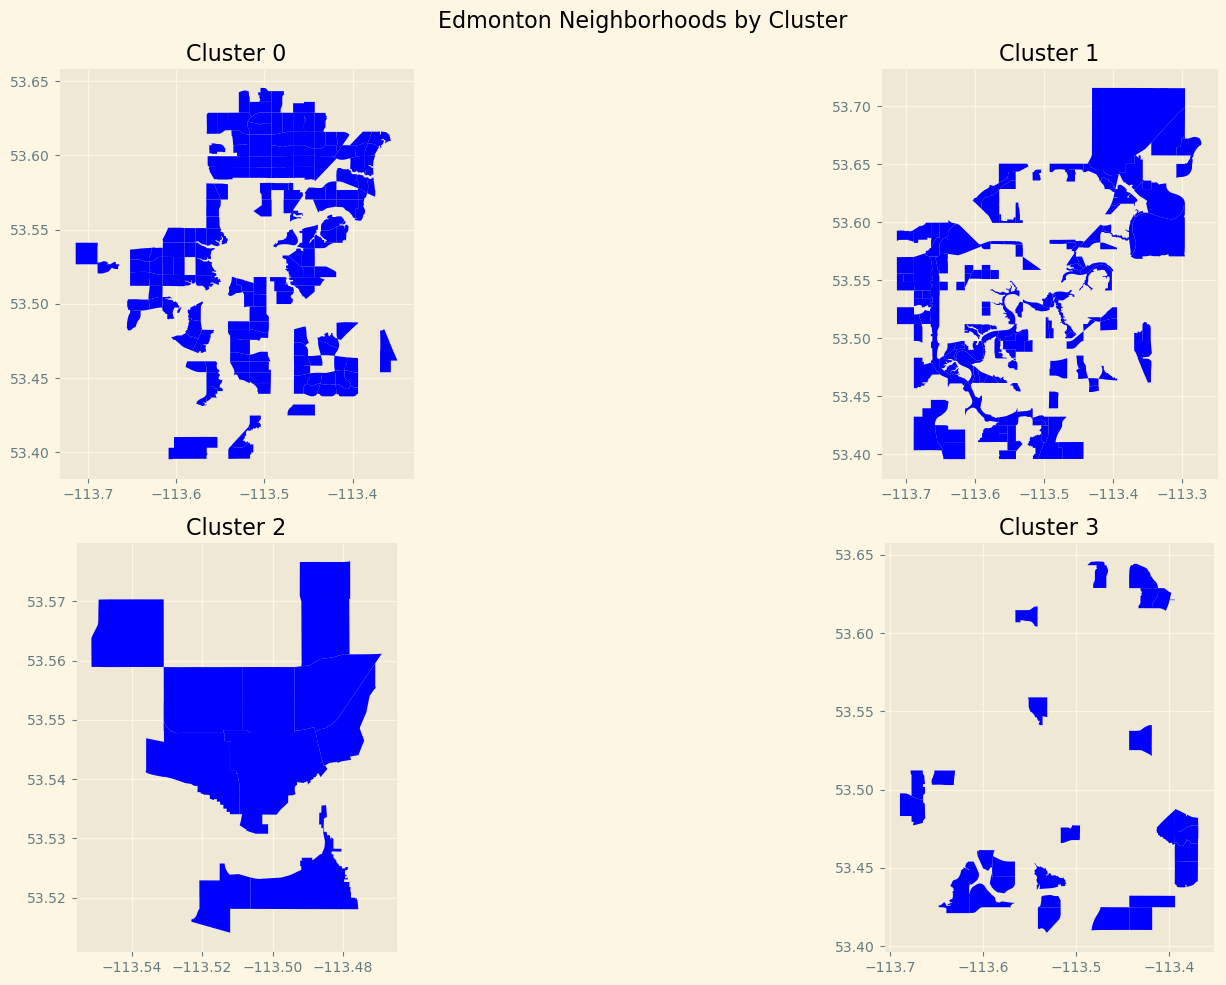

In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Join the cluster labels to the Edmonton neighborhoods dataframe
edmonton_shp = edmonton_shp.merge(df[['NGH_Name', 'Cluster']], on='NGH_Name', how='left')

# Set up a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

# Plot each cluster in a separate subplot
for i, cluster_label in enumerate(range(4)):
    # Select the neighborhoods in the current cluster and plot them on a map
    edmonton_shp[edmonton_shp['Cluster'] == cluster_label].plot(ax=axs[i//2, i%2], color='blue')
    axs[i//2, i%2].set_title(f'Cluster {cluster_label}')

# Set the overall title for the figure and tighten the layout
fig.suptitle('Edmonton Neighborhoods by Cluster', fontsize=16)
plt.tight_layout()

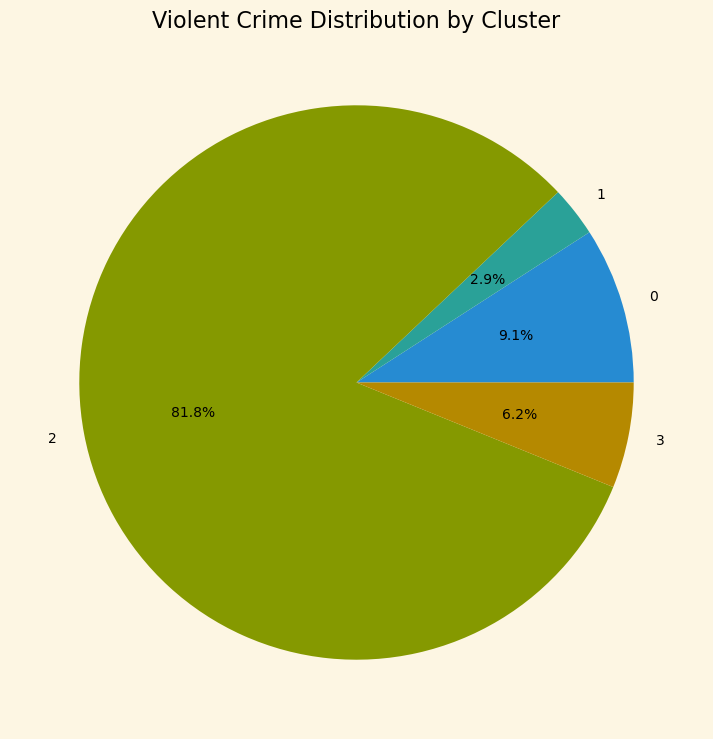

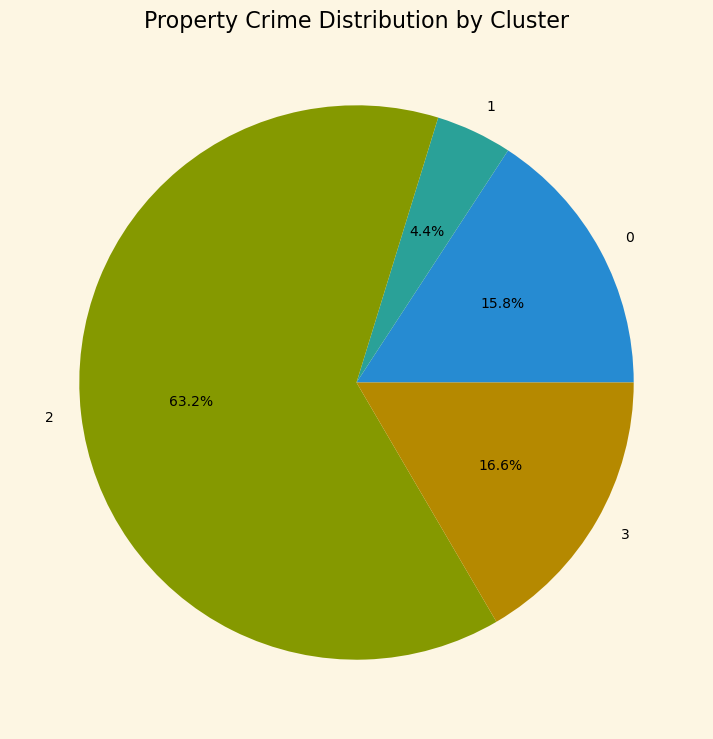

In [63]:
import matplotlib.pyplot as plt

# Define the two crime groups
Violent_Crime = ['Homicide', 'Assault', 'Robbery', 'Sexual Assaults']
Property_Crime = ['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']

# Calculate the total count of crimes in each cluster for both groups
crime_counts_violent = df.groupby('Cluster')[Violent_Crime].mean().sum(axis=1)
crime_counts_property = df.groupby('Cluster')[Property_Crime].mean().sum(axis=1)
"""This will calculate the average count of crimes in each cluster across the neighborhoods in that cluster. 
Since the original counts were discrete values, this is a more appropriate way to aggregate the data."""

# Create a pie chart for violent crime
plt.pie(crime_counts_violent, labels=crime_counts_violent.index, autopct='%1.1f%%')
plt.title('Violent Crime Distribution by Cluster')
plt.show()

# Create a pie chart for property crime
plt.pie(crime_counts_property, labels=crime_counts_property.index, autopct='%1.1f%%')
plt.title('Property Crime Distribution by Cluster')
plt.show()

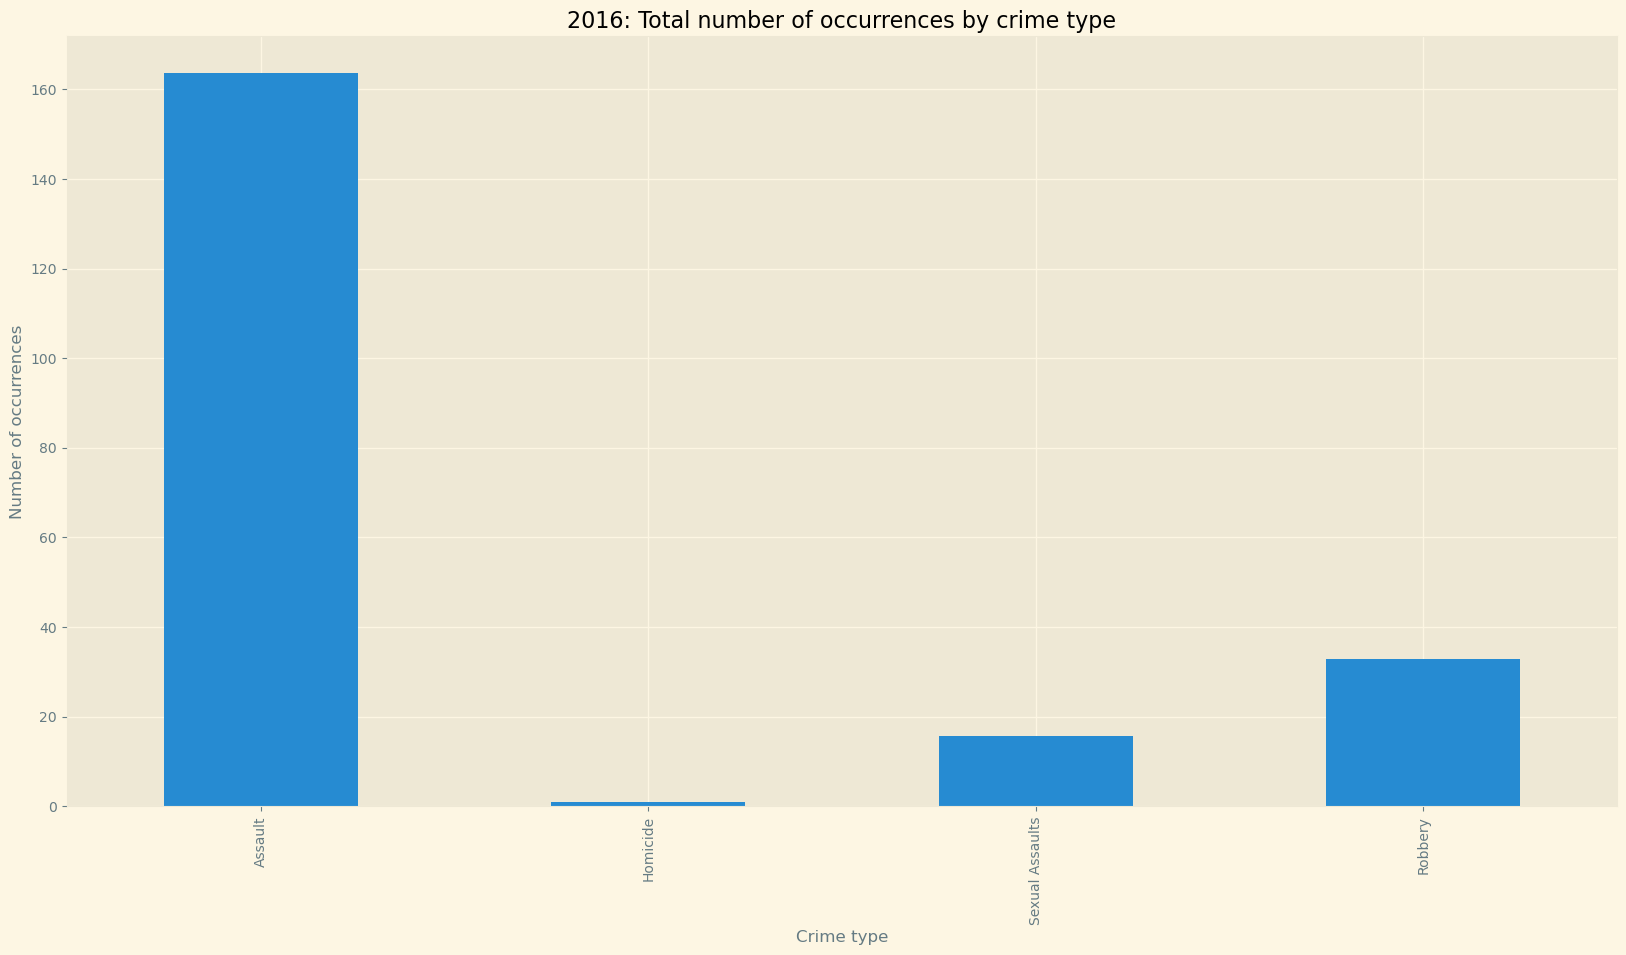

In [64]:
cluster_2[['Assault', 'Homicide', 'Sexual Assaults', 'Robbery']].mean().plot(kind='bar', figsize=(20,10))
plt.title('2016: Total number of occurrences by crime type')
plt.xlabel('Crime type')
plt.ylabel('Number of occurrences')
plt.show()

Aside from the Longitude and Latitude columns, all other numerical columns are discrete variable. Hence we can not view them as a distribution via hitplot, we can only view them as countplots.

In [107]:
# The following funciton build to view boxplots for each cluster defined by:
# Property Crimes, Severe_Crimes, Income_Levels, Employment Status and Education levels for each cluster.
def plot_data_boxplots(data, group_type):
    # Define the variables
    property_crime = ['Break and Enter', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']
    severe_crime = ['Assault', 'Homicide', 'Robbery', 'Sexual Assaults']
    income_levels = ['Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K',
                     'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K',
                     'Income_200K to less than 250K', 'Income_250K or more']
    employment_status = ['Homemaker', 'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
                         'Permanently Unemployed', 'Employment_No Response']
    education_level = ['Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']

    # Select the variable type
    if group_type == 'Property':
        var_cols = property_crime
    elif group_type == 'Severe':
        var_cols = severe_crime
    elif group_type == 'Income':
        var_cols = income_levels
    elif group_type == 'Employment':
        var_cols = employment_status
    elif group_type == 'Education':
        var_cols = education_level
    else:
        raise ValueError('Invalid group type')

    # Create a grid of subplots for the variable boxplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
    plt.subplots_adjust(hspace=0.4)
    for i in range(4):
        row = i // 2
        col = i % 2
        cluster_data = data[data['Cluster'].eq(i)]
        sns.boxplot(data=cluster_data[var_cols], ax=axs[row, col])
        axs[row, col].set_title(f'Cluster {i}')
        axs[row, col].tick_params(axis='x', labelrotation=45)

    # Set the title based on the group type
    if group_type == 'Property':
        plt.suptitle('Property Crime Box Plots by Cluster', fontsize=16)
    elif group_type == 'Severe':
        plt.suptitle('Severe Crime Box Plots by Cluster', fontsize=16)
    elif group_type == 'Income':
        plt.suptitle('Income Level Box Plots by Cluster', fontsize=16)
    elif group_type == 'Employment':
        plt.suptitle('Employment Status Box Plots by Cluster', fontsize=16)
    elif group_type == 'Education':
        plt.suptitle('Education Level Box Plots by Cluster', fontsize=16)
    else:
        raise ValueError('Invalid group type')

    plt.show()


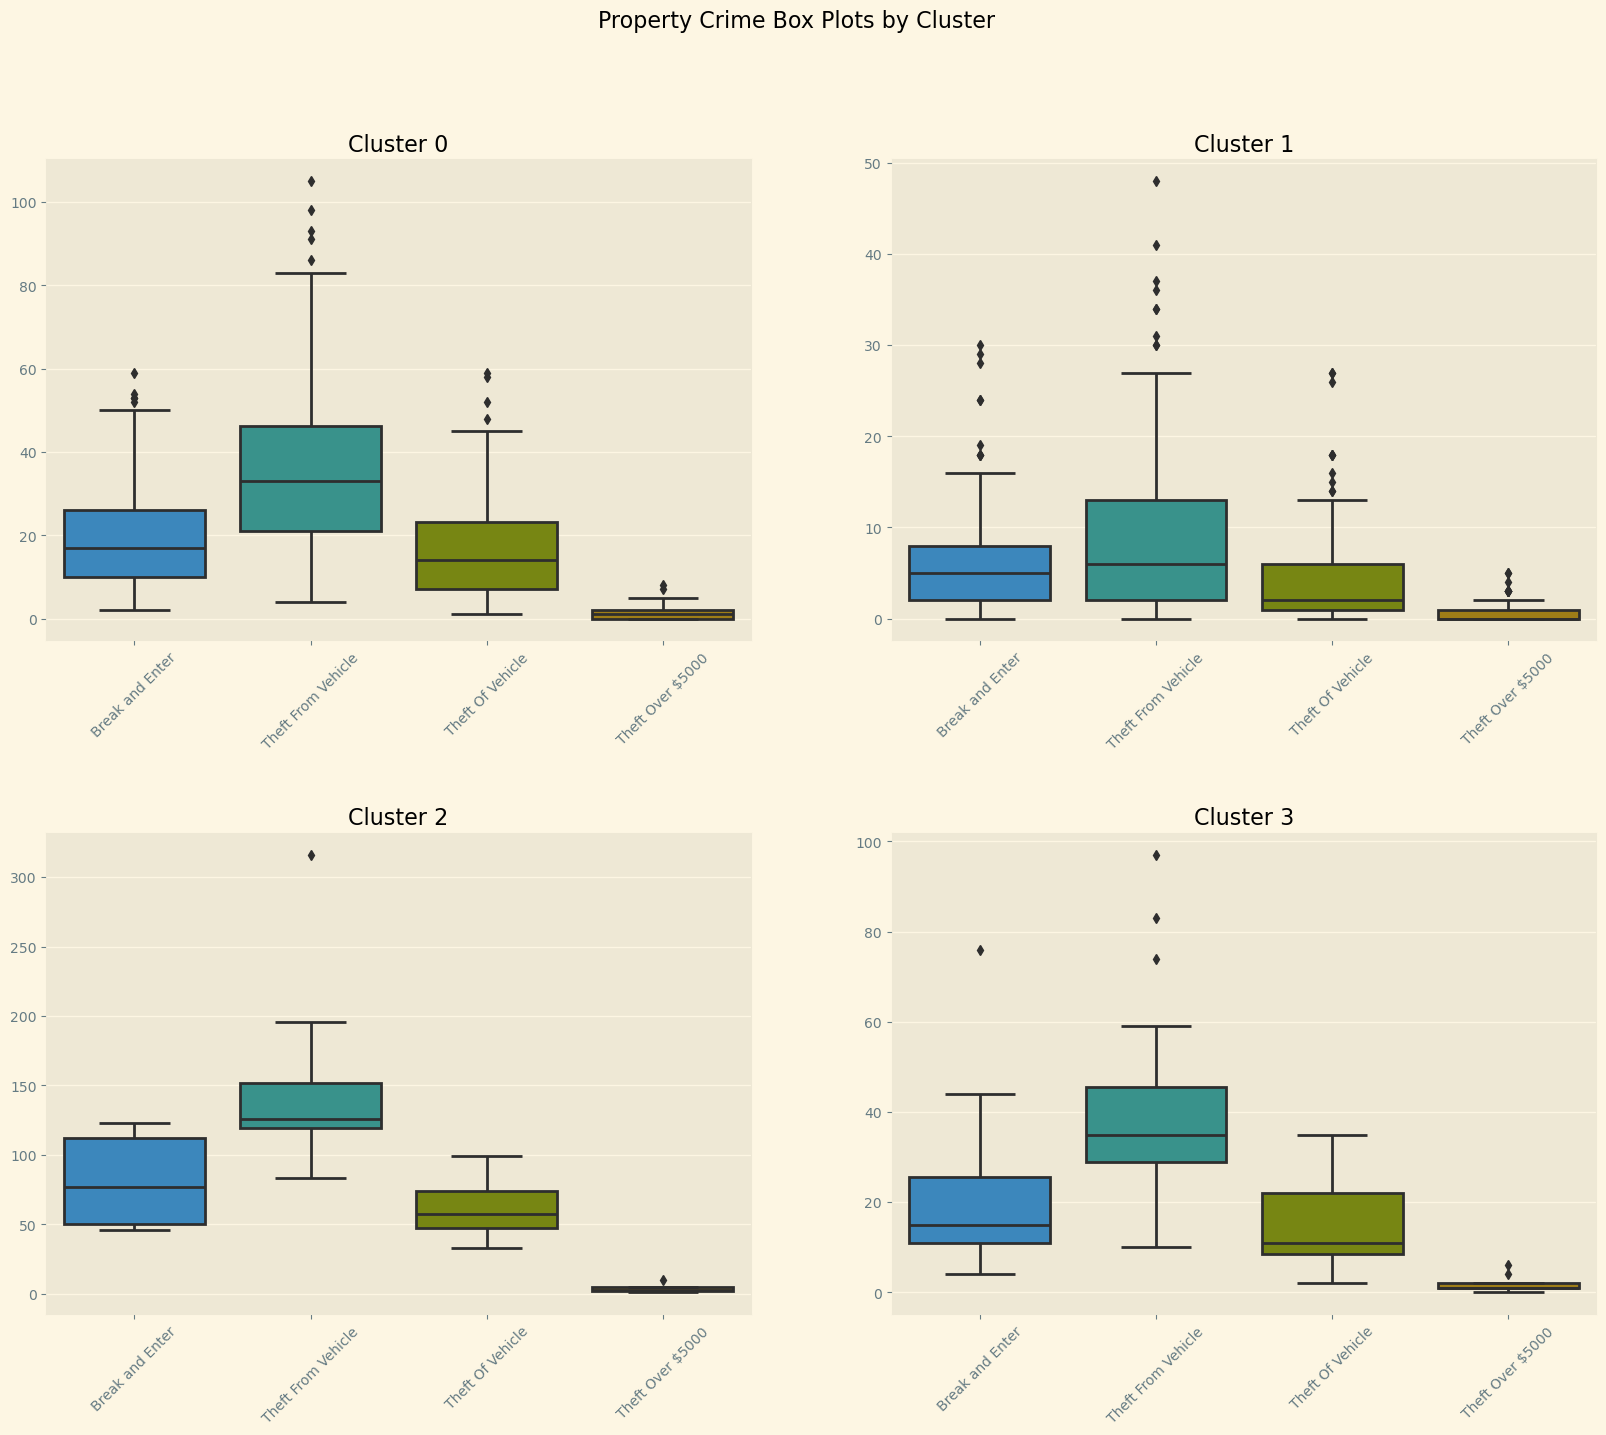

In [110]:
# Property Crimes by Cluster
plot_data_boxplots(df, 'Property')

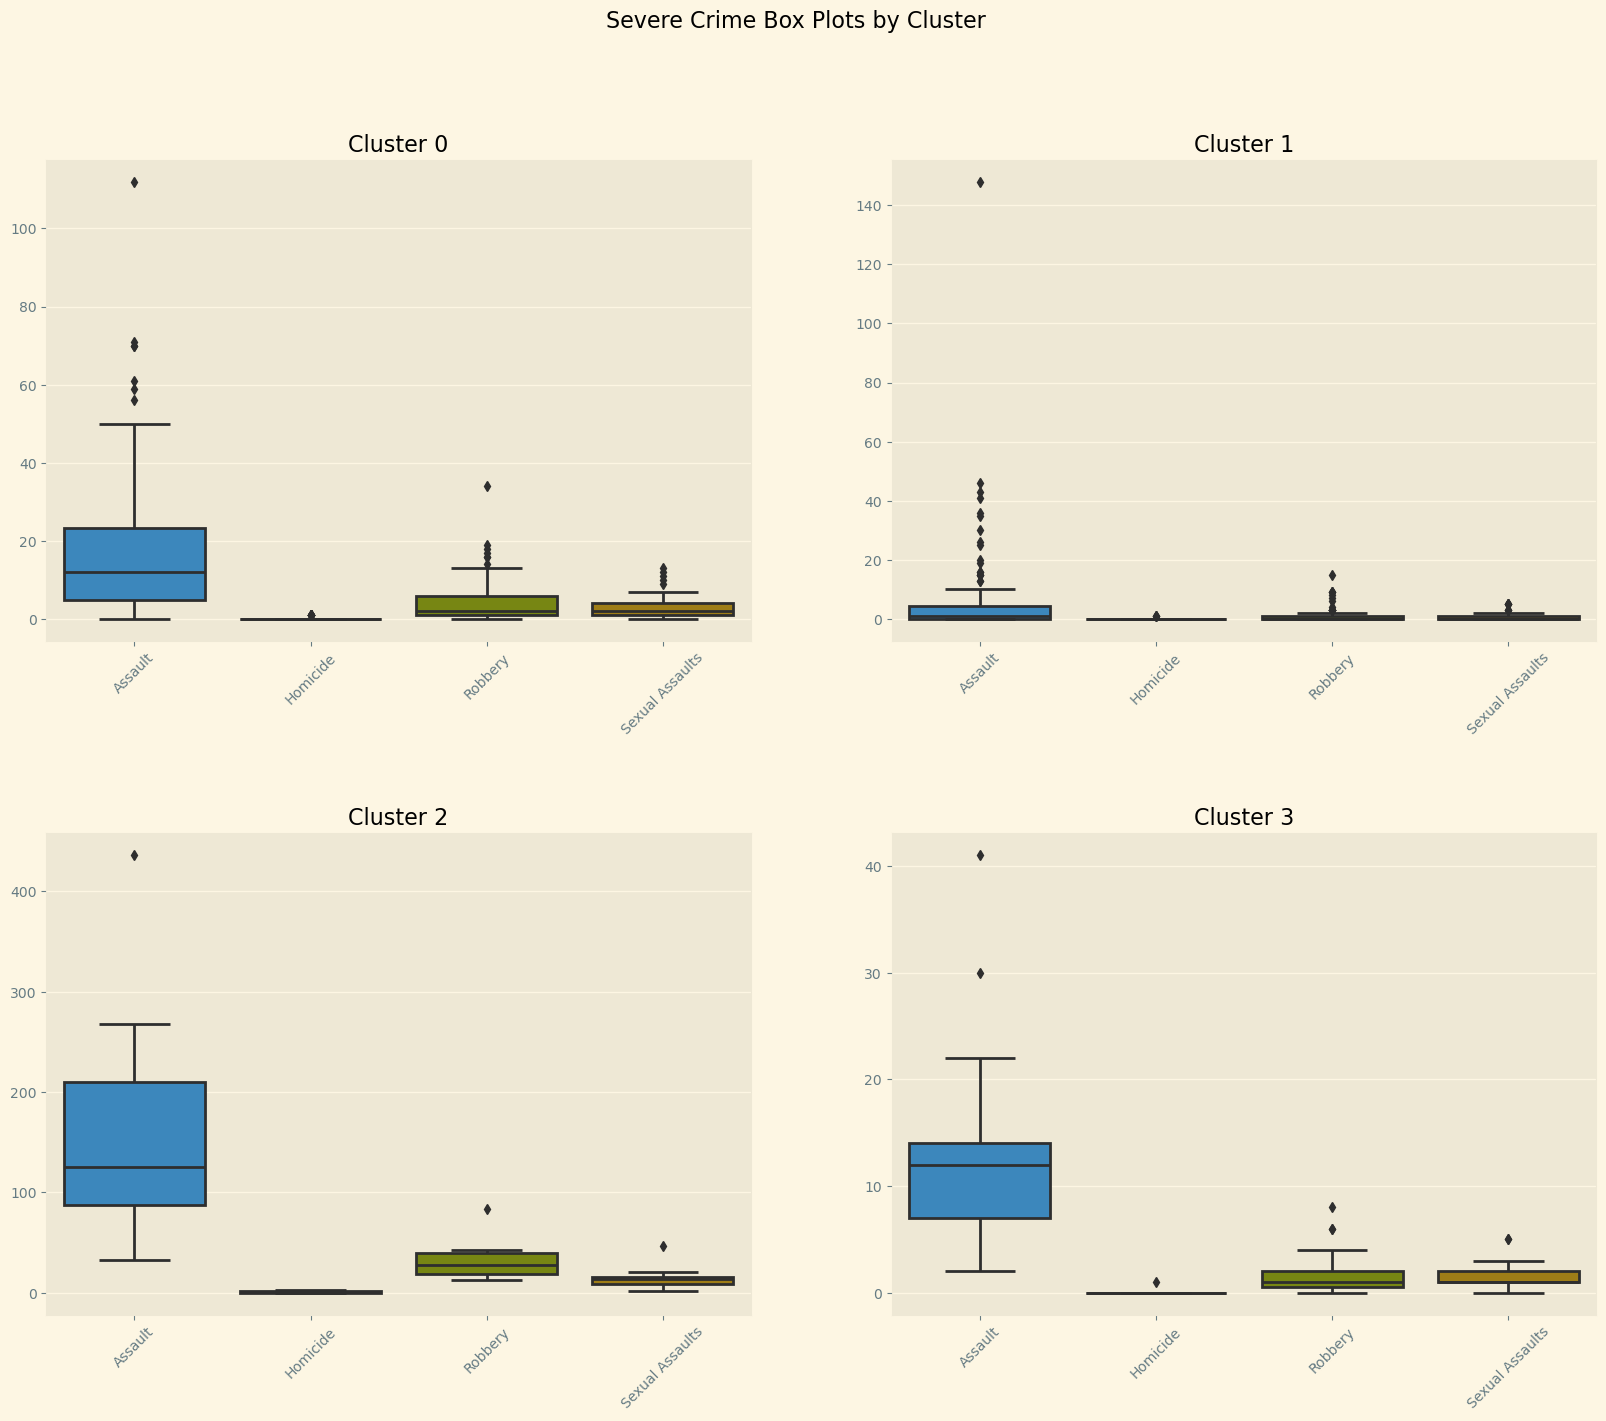

In [111]:
# Severe Crimes by Cluster
plot_data_boxplots(df, 'Severe')

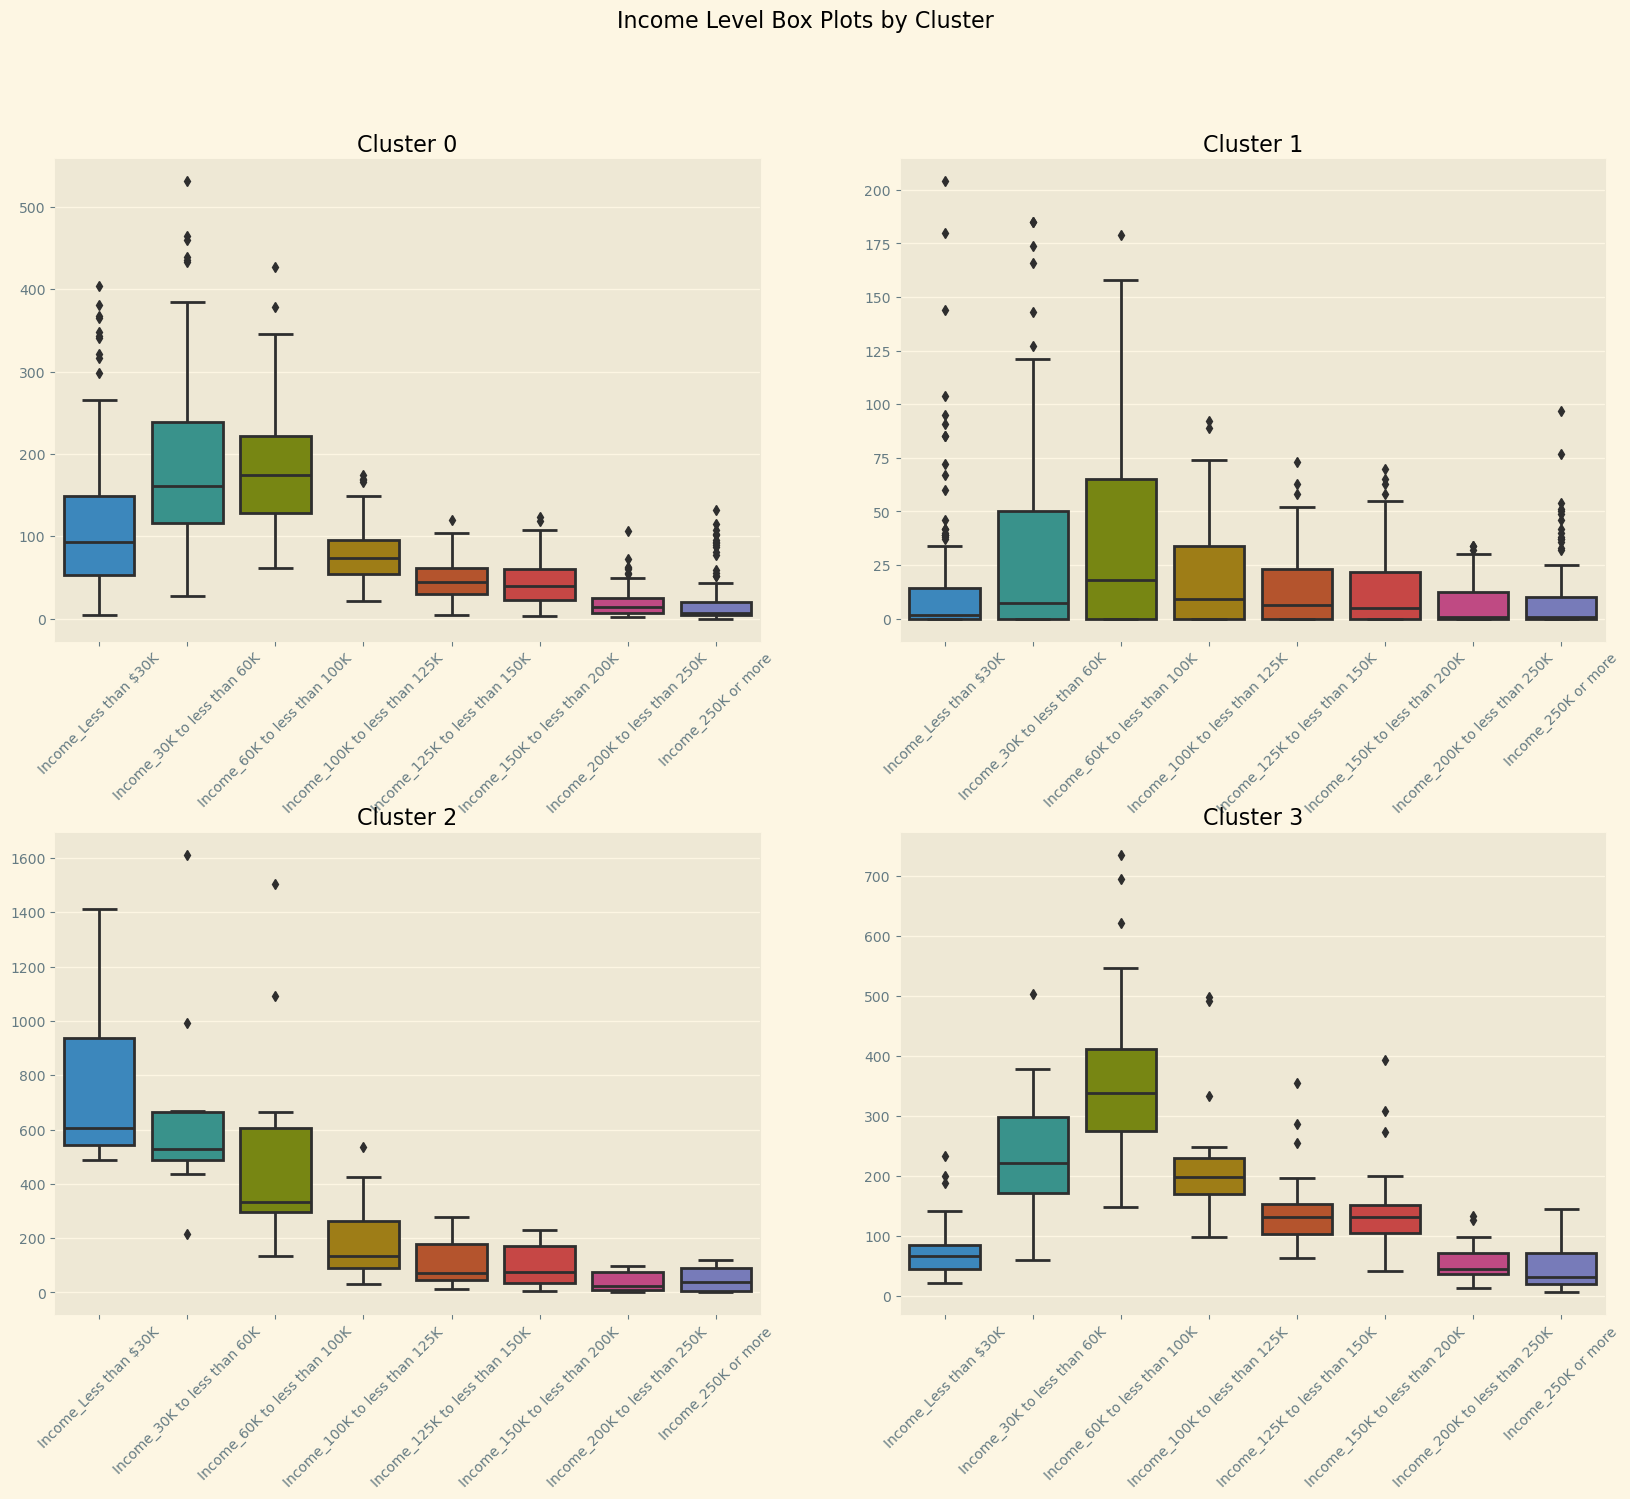

In [112]:
# Income_levels by Cluster
plot_data_boxplots(df, 'Income')

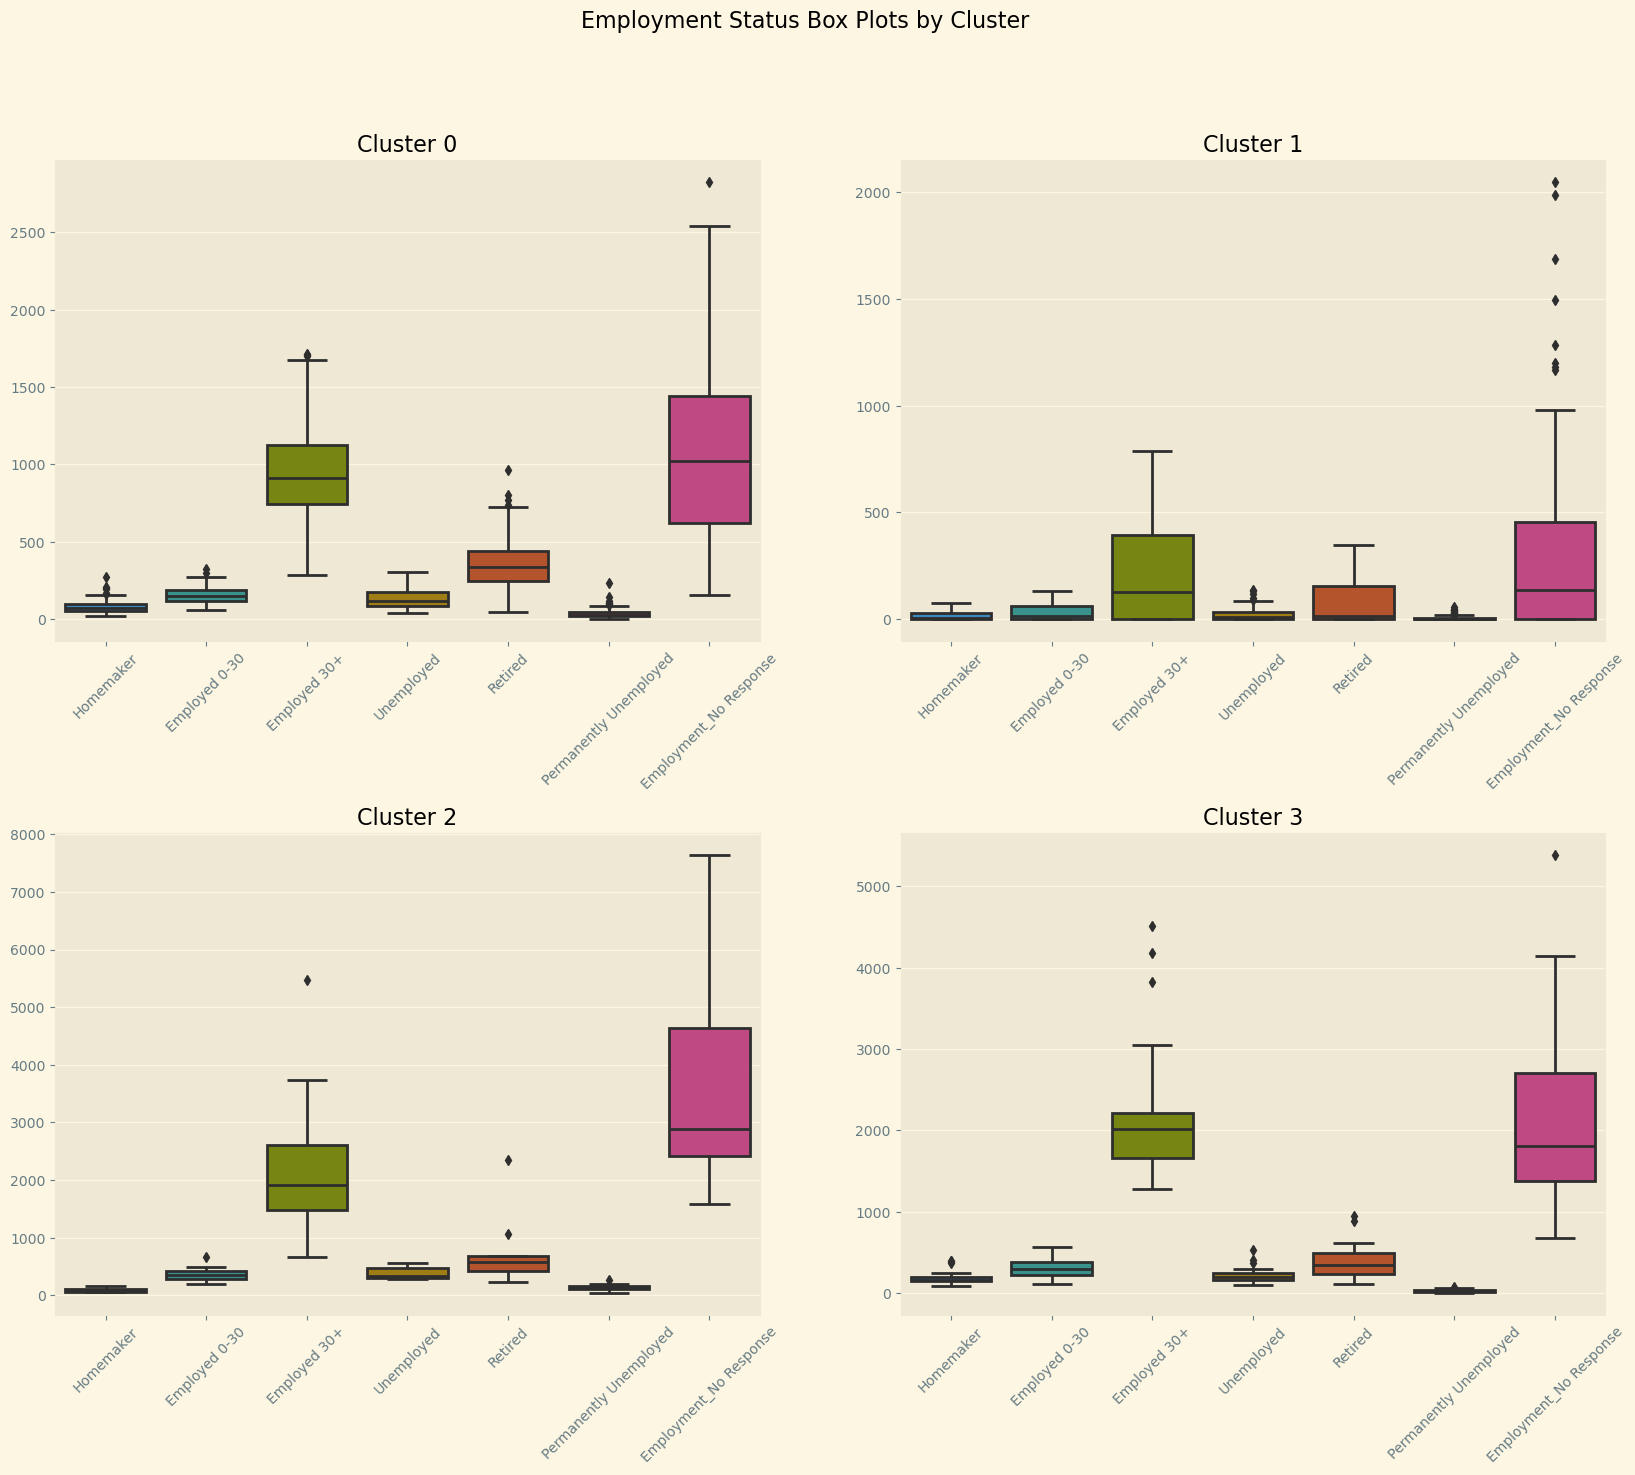

In [113]:
# Employment Levels by Cluster
plot_data_boxplots(df, 'Employment')

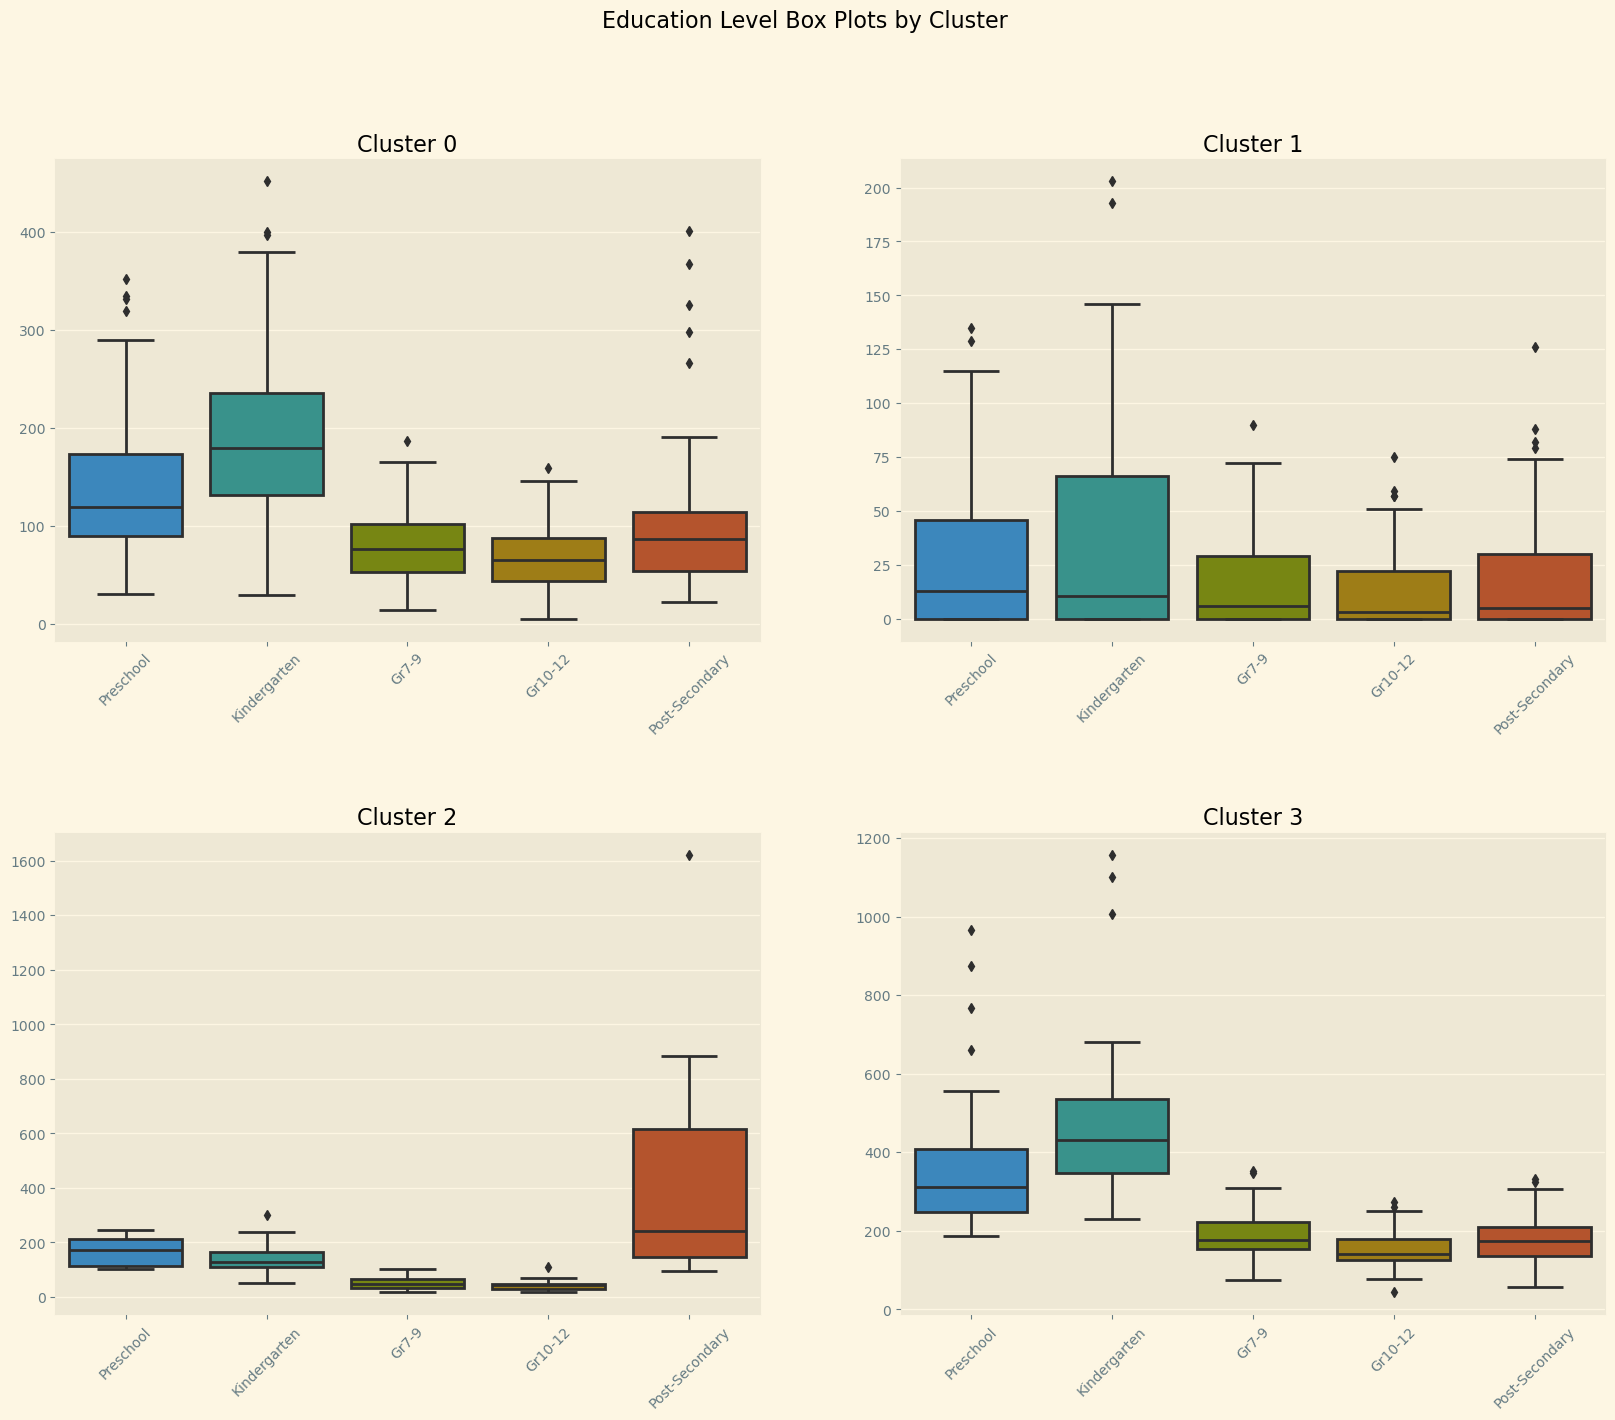

In [114]:
# Education Levels by Cluster
plot_data_boxplots(df, 'Education')

Using Assessed Value column on the Clusters

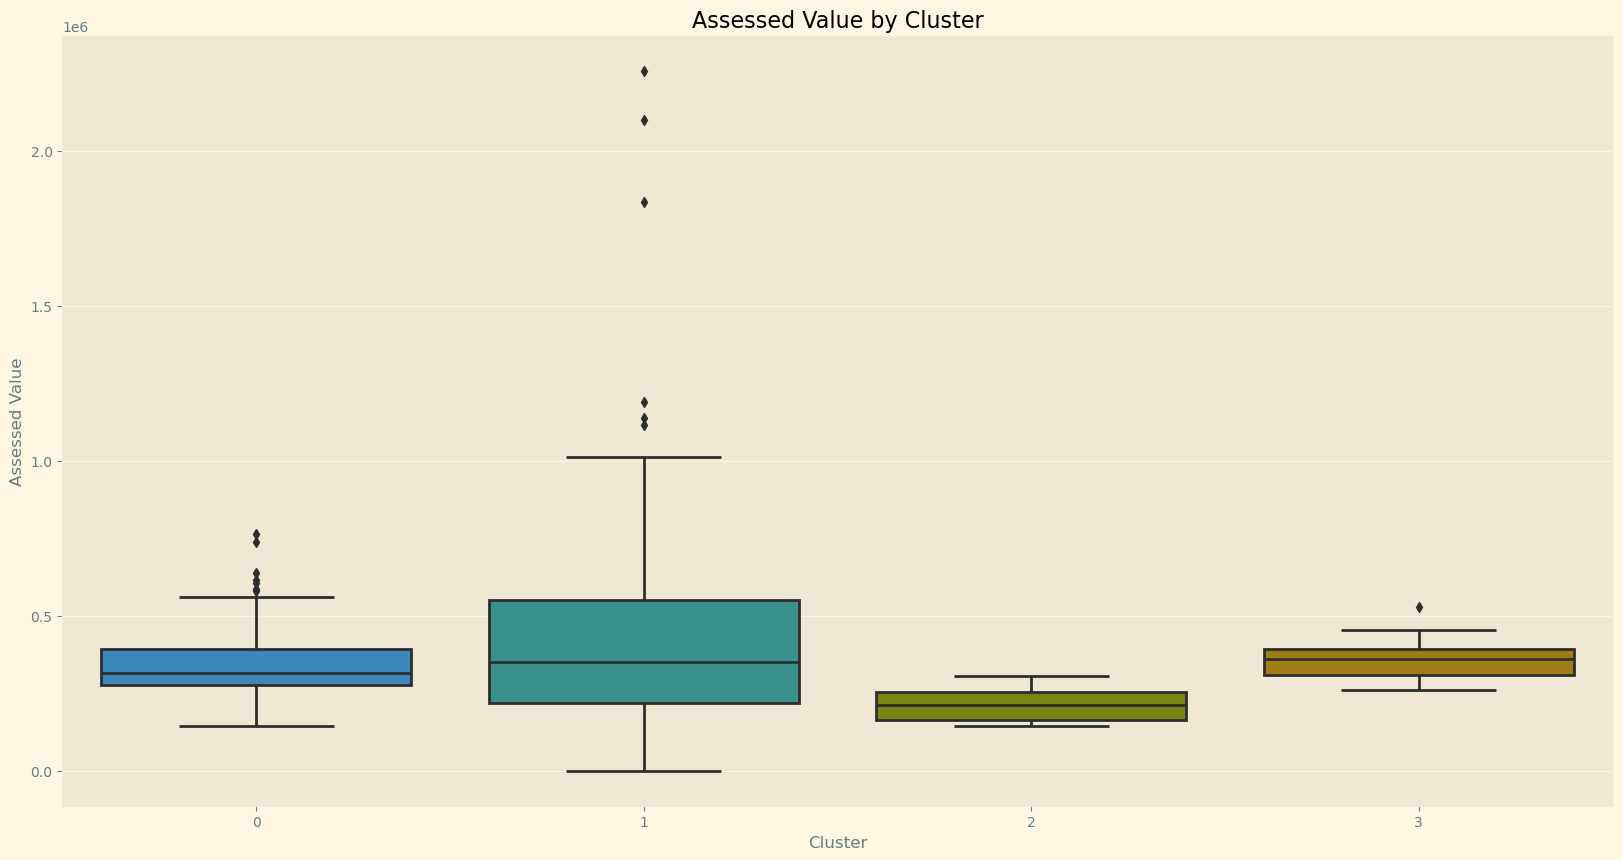

In [67]:
# Set the figure size
plt.figure(figsize=(20,10))

# Create a boxplot of the Assessed Value by Cluster
sns.boxplot(x='Cluster', y='Assessed Value', data=df)
plt.title('Assessed Value by Cluster')
plt.show()

In [68]:
df['Assessed Value'].describe()

count    3.250000e+02
mean     3.709244e+05
std      2.477898e+05
min      5.000000e+02
25%      2.670297e+05
50%      3.238807e+05
75%      4.101587e+05
max      2.259944e+06
Name: Assessed Value, dtype: float64

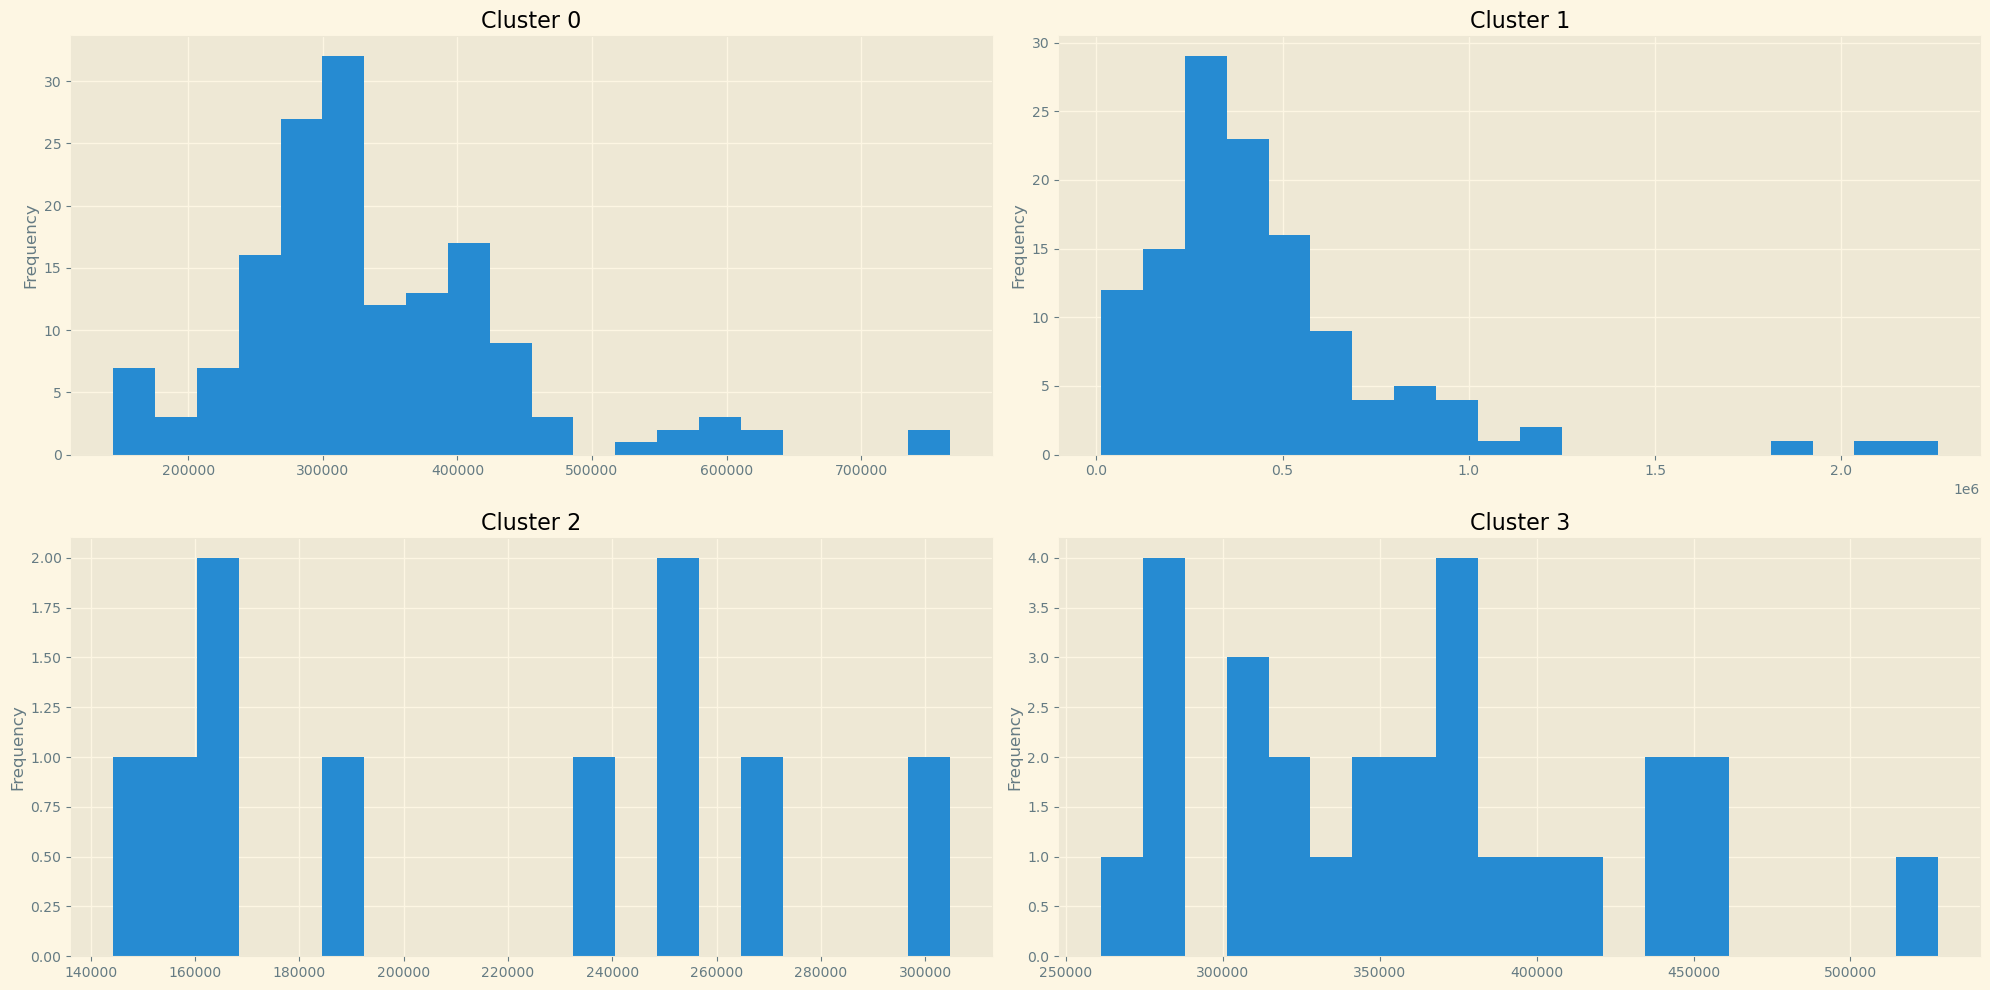

In [69]:
# Create a bar plot of the assessed value for each cluster
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.subplots_adjust(hspace=0.4)
for i in range(4):
    cluster_data = df[df['Cluster'].eq(i) & (df['Assessed Value'] > 10000)]
    cluster_data['Assessed Value'].plot(kind='hist', bins=20, ax=axs[i//2, i%2], title=f'Cluster {i}')
    
plt.tight_layout()
plt.show()

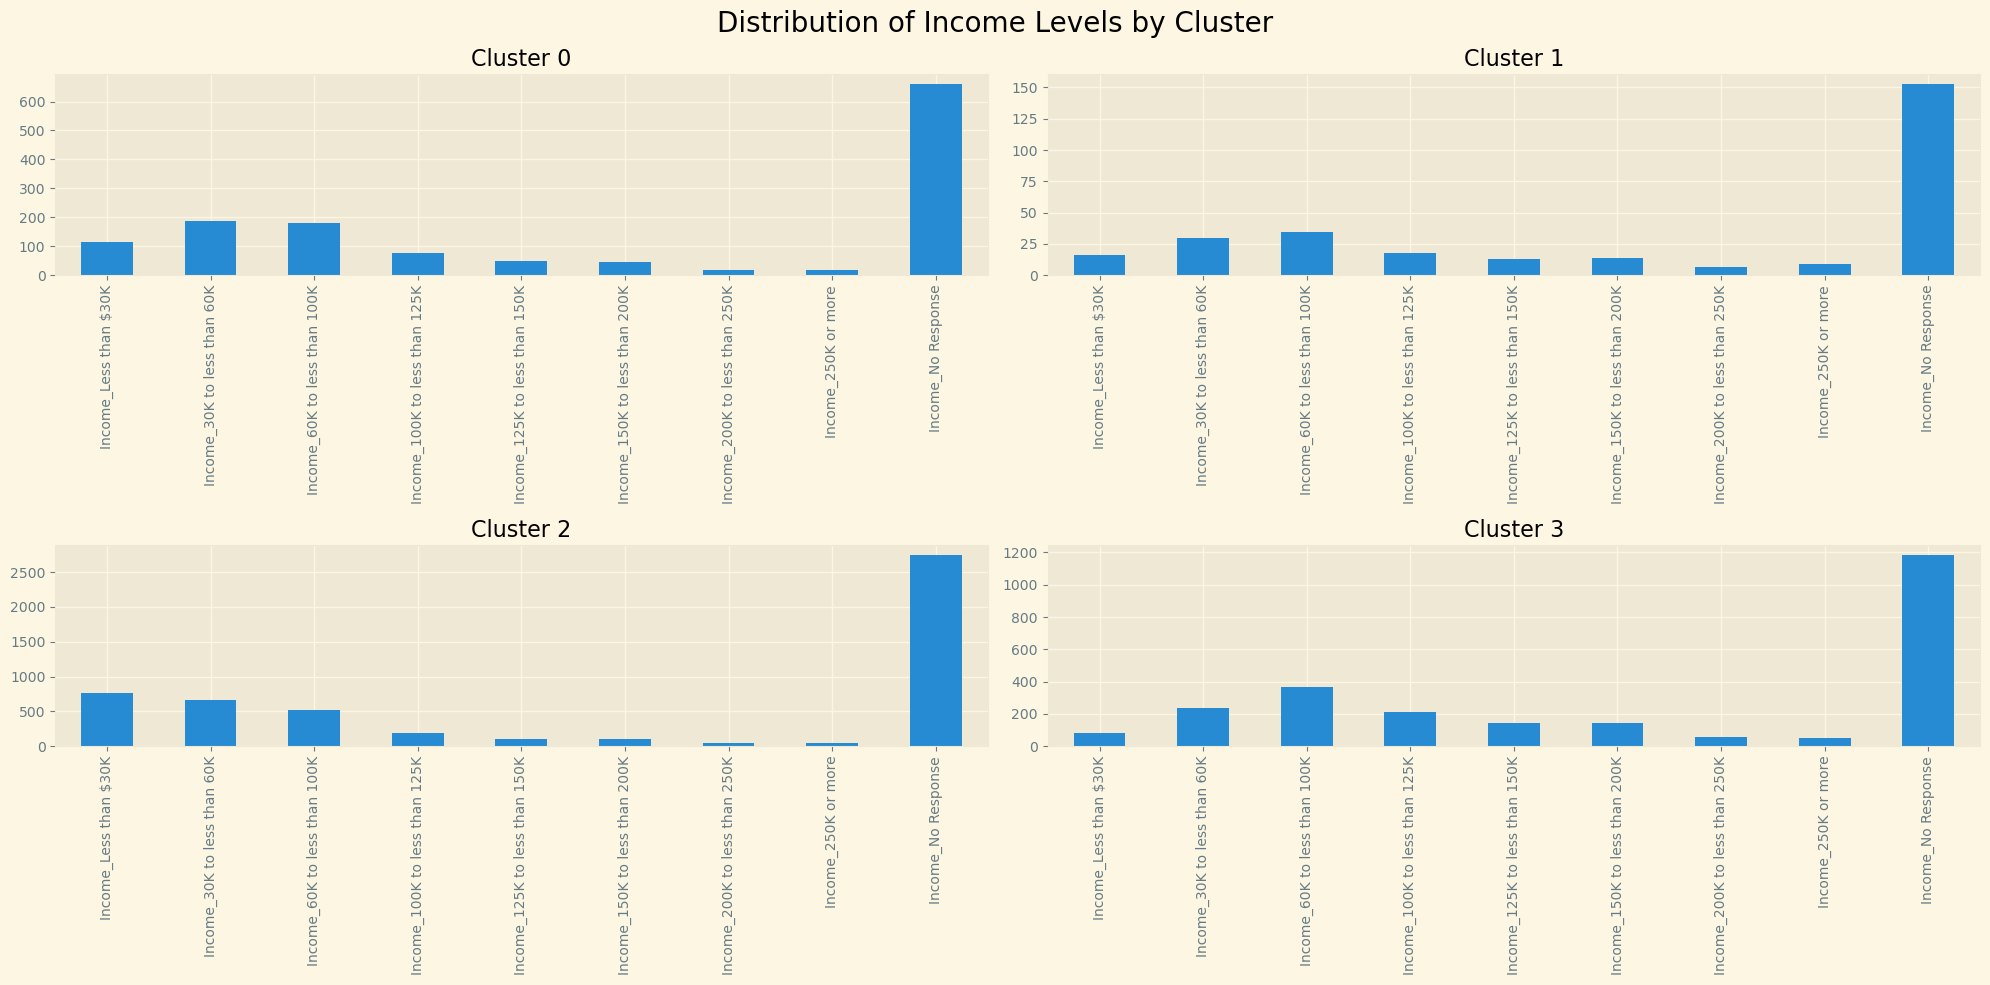

In [70]:

# Create a bar plot of the income levels for each cluster
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4)
for i in range(4):
    cluster_data = df[df['Cluster'].eq(i)]
    income_cols = ['Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K',
                   'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K',
                   'Income_200K to less than 250K', 'Income_250K or more', 'Income_No Response']
    cluster_data[income_cols].mean().plot(kind='bar', ax=axs[i//2, i%2], title=f'Cluster {i}')
plt.suptitle('Distribution of Income Levels by Cluster', fontsize=20)

plt.tight_layout()
plt.show()


It might be a good idea to redistribute the count of people who did not respond to the top 4 income columns within each cluster, as this could give us a more accurate picture of the income distribution within each cluster. However, it's important to note that this approach may not be completely accurate, as we do not know the actual income of the people who did not respond.

It's always important to consider the limitations of the data and potential biases when interpreting the results. In this case, the high number of "No Response" values for income could indicate a potential bias in the data or a reluctance by some residents to disclose their income. Adding them into the top 4 income columns within the clusters could potentially skew the results and should be avoided.

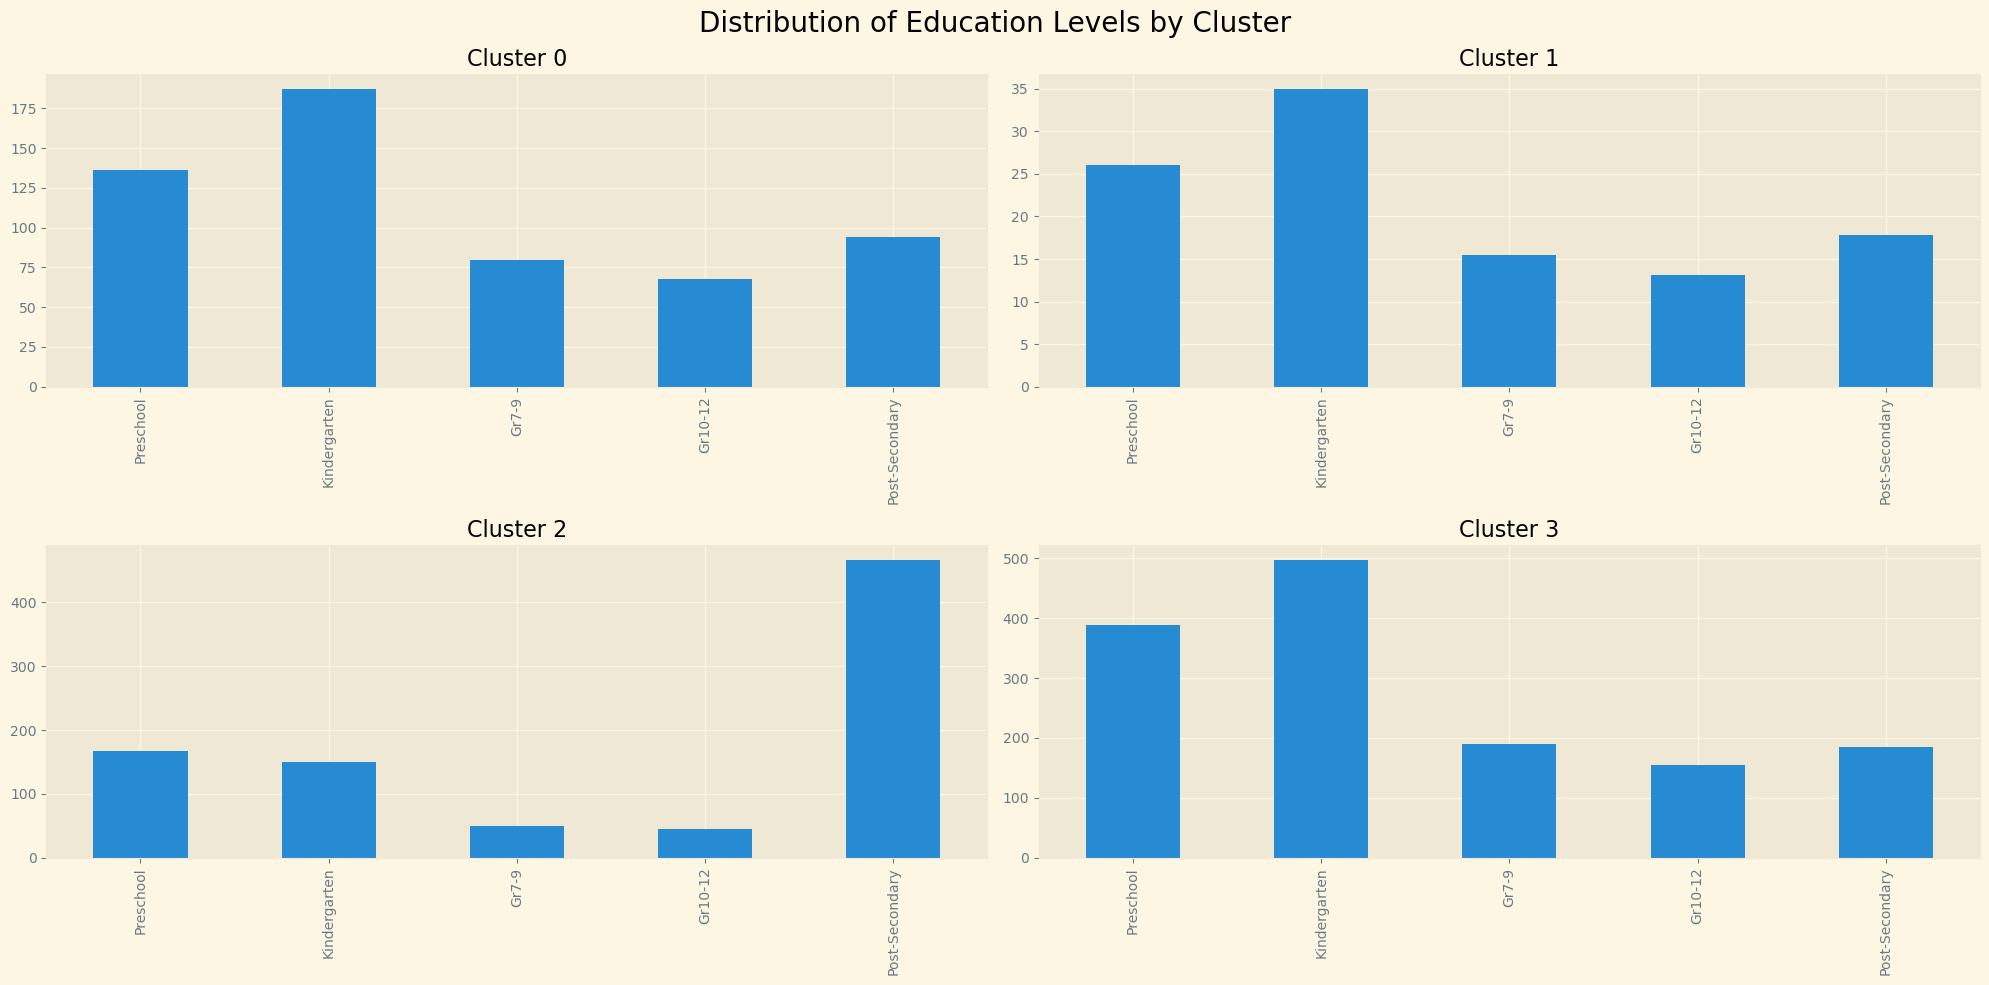

In [71]:
# Create a bar plot of the income levels for each cluster
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.subplots_adjust(hspace=0.4)
for i in range(4):
    cluster_data = df[df['Cluster'].eq(i)]
    education_cols = ['Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']
    cluster_data[education_cols].mean().plot(kind='bar', ax=axs[i//2, i%2], title=f'Cluster {i}')
plt.suptitle('Distribution of Education Levels by Cluster', fontsize=20)
plt.tight_layout()
plt.show()

The presence of a high number of individuals with post-secondary education in Cluster 2 with the highest crime rates can be explained by various factors. For example, it could be that individuals with higher education levels are more likely to report crimes, leading to higher crime rates in areas with more educated residents. Additionally, areas with more educated residents may be more densely populated, which can lead to more crime.

Regarding the income levels in Cluster 2, it's possible that areas with higher crime rates tend to have lower average incomes due to various factors, such as a lack of economic opportunities or higher unemployment rates. Additionally, it's possible that individuals with lower incomes may be more vulnerable to becoming victims of crimes, such as theft and robbery, which could contribute to higher crime rates in areas with lower-income residents.

## Statistical Tests

Since the variables in the dataframe are counts and the dataframe has a limited number of rows, it may not be appropriate to perform statistical tests between the clusters. This is because the assumptions of normality and independence required for many statistical tests may not hold true for count data. In addition, with a limited number of rows, statistical tests may not have enough power to detect significant differences between the clusters.

However, exploratory data analysis techniques such as box plots, heatmaps, and correlation analysis can still provide insights into the relationships between variables and the differences between clusters. These techniques do not rely on assumptions of normality and independence and can still provide valuable information for making decisions or identifying patterns in the data.